<a href="https://colab.research.google.com/github/xDD5/EcONOM/blob/main/Issam_Fradi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$\color{red}{Corrélation\,entre\,l'\,indice\,Allemand\,DAX\,et\,l'\,inflation\,en\,Europe:}$





#*Introduction:*
L'économétrie des séries temporelles constitue un pilier central dans l'analyse quantitative moderne, offrant des outils puissants pour comprendre et prévoir les dynamiques économiques. La pertinence de telles méthodes est particulièrement évidente lorsqu'il s'agit d'examiner les interactions entre les marchés financiers et les indicateurs macroéconomiques. Ce projet s'inscrit dans cette perspective, en se focalisant sur deux séries temporelles d'importance capitale : l'indice boursier DAX, qui reflète les performances des 30 plus grandes entreprises cotées à la Bourse de Francfort en Allemagne, et l'indice des prix à la consommation (CPI) de la zone euro, qui mesure l'évolution des prix des biens et services et sert de baromètre principal de l'inflation.

Le choix de ces deux séries est motivé par leur influence significative et leur représentativité dans l'économie de la zone euro. D'une part, le DAX est un indicateur avancé de la santé économique, reflétant les anticipations des investisseurs et les performances des entreprises. D'autre part, le CPI est un indicateur retardé qui synthétise les pressions inflationnistes et le pouvoir d'achat des consommateurs. L'intersection de ces deux séries offre un terrain fertile pour explorer les dynamiques entre les marchés financiers et la politique monétaire, ainsi que leurs implications pour le développement économique.

Les données pour cette analyse seront extraites de sources fiables et officielles, couvrant une période et une fréquence d'observation qui garantissent la robustesse des estimations. La préférence sera donnée aux données désaisonnalisées pour neutraliser l'effet des fluctuations saisonnières et isoler les tendances sous-jacentes. Environ 166 observations seront recueillies pour chaque série, offrant une base solide pour l'estimation précise des modèles.

L'analyse débutera par une exploration visuelle des séries via des représentations graphiques et des autocorrélogrammes, permettant de détecter des patterns initiaux et de formuler des hypothèses préliminaires. Des tests de racine unitaire suivront, afin de déterminer la stationnarité des séries et de choisir les méthodes de stationnarisation appropriées.

Ensuite, un modèle ARMA sera ajusté à l'une des séries, en veillant à respecter les conditions de validité requises. Les prévisions à court terme seront calculées, révélant la dynamique interne de la série choisie. La modélisation multivariée prendra forme à travers l'estimation d'un modèle VAR, permettant d'appréhender les interactions entre les séries.

La causalité au sens de Granger sera testée pour déterminer l'existence de liens directionnels entre le DAX et le CPI. Une analyse impulsion-réponse approfondira la compréhension de la réaction des séries à des chocs exogènes. Enfin, le test de cointégration de Johansen permettra de déceler l'existence de relations à long terme entre les séries.

À travers cette étude, nous postulons que le DAX et le CPI sont des indicateurs clés qui, lorsqu'ils sont analysés conjointement, peuvent révéler des insights précieux sur la dynamique économique de la zone euro. Nous nous attendons à ce que les résultats non seulement valident des théories économiques existantes mais aussi offrent de nouvelles perspectives sur l'interaction entre les marchés financiers et les politiques économiques.

**Hypothèses de Recherche :**

1. L'indice DAX influence le CPI dans la zone euro, reflétant l'impact des performances des entreprises sur l'économie générale et l'inflation.

2. Le CPI affecte à son tour les performances du DAX, les niveaux d'inflation ayant un impact sur les décisions des entreprises et les anticipations des investisseurs.
3. Il existe une relation de causalité entre le DAX et le CPI, suggérant que les changements dans l'un peuvent être utilisés pour prévoir des variations dans l'autre.
4. Des chocs impactant l'une des séries produiront des effets mesurables sur l'autre, révélant une interdépendance significative.

$\rightarrow$Cette analyse a pour but de fournir une compréhension approfondie de la dynamique entre le DAX et le CPI et d'offrir des prévisions fiables qui pourraient s'avérer précieuses pour les décideurs politiques, les investisseurs et les analystes économiques.

#Importation des données :

In [1]:
#installer les librairies
install.packages("quantmod")
library(quantmod)

# Definir le symbole DAX
symbol_dax <- "DAX"

# Définir les horizons :
start_date <- "2010-01-01"
end_date <- "2023-09-01"

# Télécharger les données de DAX monthly
getSymbols(symbol_dax, src = "yahoo", from = start_date, to = end_date, auto.assign = TRUE)
monthly_data <- to.monthly(DAX, name = "DAX_monthly")

# Enregistrer les données en format CSV :
write.csv(monthly_data, file = "DAX_monthly_data.csv")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "DAX"

In [2]:
dates <- seq(as.Date("2010-01-01"), as.Date("2023-10-01"), by = "1 month")

DAX <- data.frame(
  Date = index(monthly_data),
  DAX = coredata(monthly_data)
)
head(DAX)

,Date,DAX.DAX_monthly.Open,DAX.DAX_monthly.High,DAX.DAX_monthly.Low,DAX.DAX_monthly.Close,DAX.DAX_monthly.Volume,DAX.DAX_monthly.Adjusted
,<yearmon>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Oct 2014,25.090,25.75,25.028,25.750,50500,20.93070
2,Nov 2014,26.050,27.34,25.250,27.330,12100,22.21499
3,Dec 2014,28.010,29.00,24.400,26.163,8800,21.26641
4,Jan 2015,26.163,27.00,24.880,26.500,300300,21.54033
5,Feb 2015,27.060,28.11,26.320,28.021,468900,22.77666
6,Mar 2015,28.560,29.18,27.040,28.220,725300,22.93842


In [3]:
CPI <- read.csv("CPI.csv")
head(CPI)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag.Codes
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
1,OECD,CPI,TOT,AGRWTH,M,2010-01,2.047299,NA
2,OECD,CPI,TOT,AGRWTH,M,2010-02,1.879990,NA
3,OECD,CPI,TOT,AGRWTH,M,2010-03,2.047934,NA
4,OECD,CPI,TOT,AGRWTH,M,2010-04,2.065891,NA
5,OECD,CPI,TOT,AGRWTH,M,2010-05,1.944904,NA
6,OECD,CPI,TOT,AGRWTH,M,2010-06,1.460480,NA


In [4]:
# Delete the "TIME" column
CPI <- CPI[, -which(names(CPI) == "TIME")]


In [5]:
head (CPI)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag.Codes
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
1,OECD,CPI,TOT,AGRWTH,M,2.047299,NA
2,OECD,CPI,TOT,AGRWTH,M,1.879990,NA
3,OECD,CPI,TOT,AGRWTH,M,2.047934,NA
4,OECD,CPI,TOT,AGRWTH,M,2.065891,NA
5,OECD,CPI,TOT,AGRWTH,M,1.944904,NA
6,OECD,CPI,TOT,AGRWTH,M,1.460480,NA


In [6]:
# Save the "CPI" data frame to a CSV file
write.csv(CPI, file = "Modified_CPI_Data.csv", row.names = FALSE)
head(CPI)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag.Codes
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
1,OECD,CPI,TOT,AGRWTH,M,2.047299,NA
2,OECD,CPI,TOT,AGRWTH,M,1.879990,NA
3,OECD,CPI,TOT,AGRWTH,M,2.047934,NA
4,OECD,CPI,TOT,AGRWTH,M,2.065891,NA
5,OECD,CPI,TOT,AGRWTH,M,1.944904,NA
6,OECD,CPI,TOT,AGRWTH,M,1.460480,NA


In [7]:
# Create a sequence of dates from "2020-01-01" to "2023-09-01" (one month increments)
dates <- seq(as.Date("2010-01-01"), as.Date("2023-09-01"), by = "1 month")

CPI$Date <- dates

In [8]:
head (CPI)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag.Codes,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<date>
1,OECD,CPI,TOT,AGRWTH,M,2.047299,NA,2010-01-01
2,OECD,CPI,TOT,AGRWTH,M,1.879990,NA,2010-02-01
3,OECD,CPI,TOT,AGRWTH,M,2.047934,NA,2010-03-01
4,OECD,CPI,TOT,AGRWTH,M,2.065891,NA,2010-04-01
5,OECD,CPI,TOT,AGRWTH,M,1.944904,NA,2010-05-01
6,OECD,CPI,TOT,AGRWTH,M,1.460480,NA,2010-06-01


#$I.DAX$







# **Les representations graphiques et autocorrélogrammes simples et partiels des séries**

In [9]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



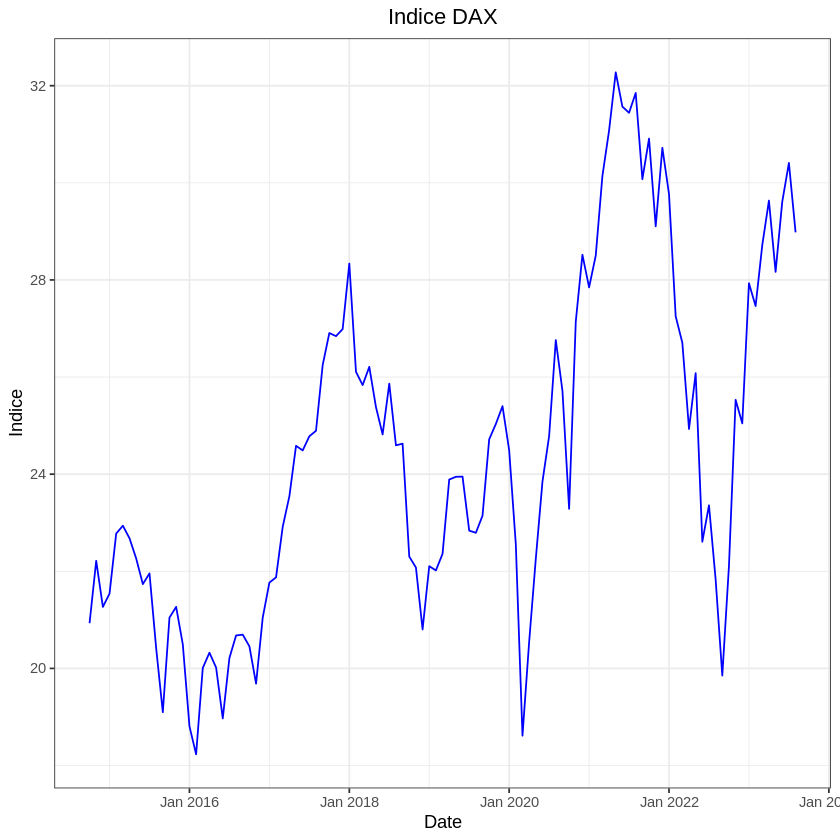

In [10]:
library(ggplot2)
p1<-ggplot(data=DAX,aes(x=Date,y=DAX.DAX_monthly.Adjusted))+geom_line(colour='blue')+ggtitle('Indice DAX')+xlab('Date')+ylab('Indice')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
p1

**Commentaire**

On trouve que le modèle n'est pas $\underline{stationnaire}$, suggérant que l'indice DAX présente des tendances ou des variations saisonnières qui doivent être prises en compte dans l'analyse économétrique. La non-stationnarité implique que les propriétés statistiques de la série, comme la moyenne et la variance, ne sont pas constantes dans le temps, ce qui est un aspect crucial à considérer lors de la modélisation des séries temporelles pour des prévisions précises et fiables.

##Tests sans la période Covid : 2010:T1 à 2019:T4



On exclut les observations à partir du premier trimestre de l'année 2020. Les résultats des tests de racine unitaire et de stationnarité ne sont modifiés. On peut dire aussi qu'ils sont robustes à cette modification de la période de test


les autocorrélogrammes simples et partiels des séries DAX:

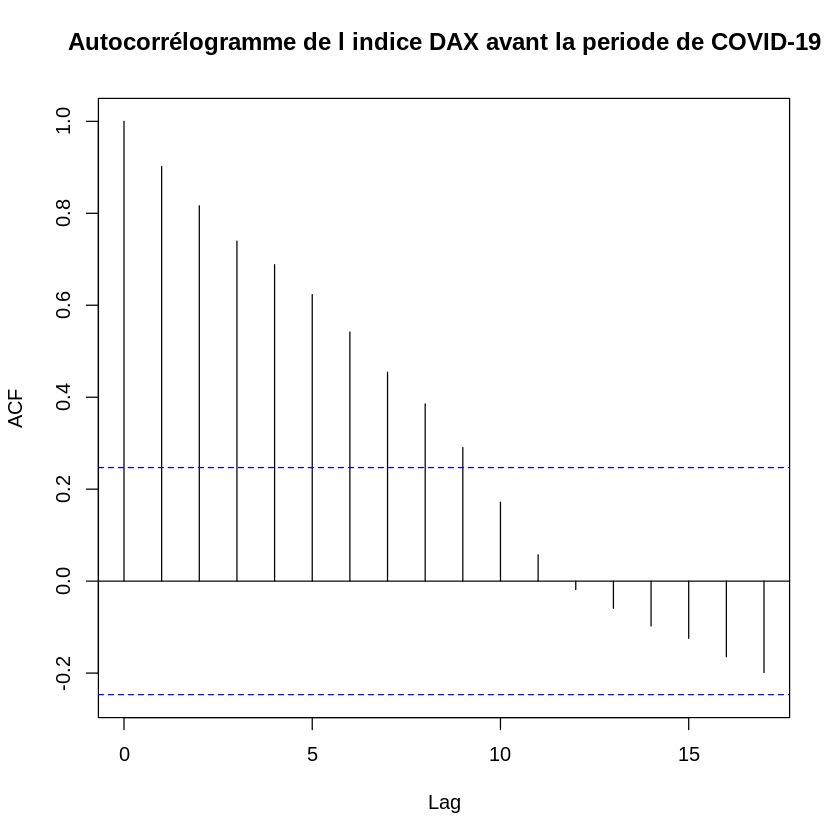

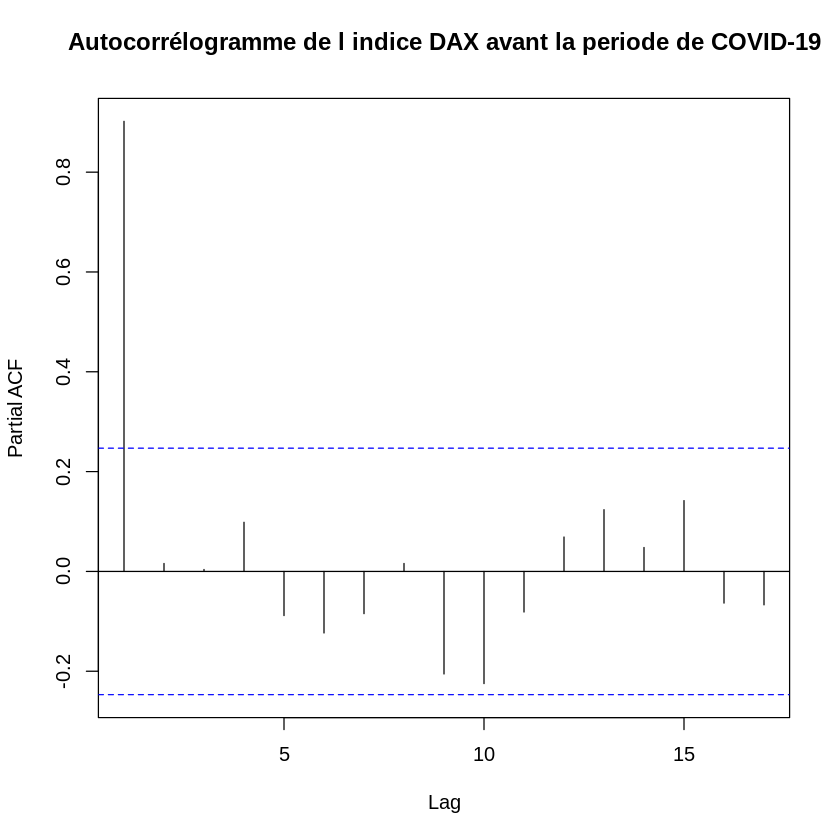

In [11]:
DAX_19T1=DAX[DAX$Date<"2020-01-01",]
acf(DAX_19T1$DAX.DAX_monthly.Adjusted, main = 'Autocorrélogramme de l indice DAX avant la periode de COVID-19')
pacf(DAX_19T1$DAX.DAX_monthly.Adjusted, main='Autocorrélogramme de l indice DAX avant la periode de COVID-19')


***Commentaire***:

Les autocorrélations de l'indice DAX sont positives et significatives jusqu'au 11ème lag, indiquant une forte dépendance temporelle. Cependant, cette dépendance diminue avec le temps, laissant supposer une possible non-stationnarité de la série. Les autocorrélations partielles montrent une signification claire uniquement pour les trois premiers lags, suggérant qu'un modèle autorégressif jusqu'à l'ordre trois pourrait convenir pour modéliser l'indice.
→Ces éléments indiquent qu'un modèle autorégressif de premier ordre, AR(1), pourrait être approprié pour modéliser l'indice DAX.

##Test de Dickey-Fuller augmenté

Importation de la librairie urca

In [12]:
install.packages('urca')
library (urca)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Regression de test:
$\Delta\,x_{t}=ρx_{t-1}+ϵ_{t}\,avec ρ=Φ_{1}-1$

Test de dickey Fuller:

$$\left\lbrace\begin{array}{l} H_{0}\,:\, Φ=1\,\Leftrightarrowρ =0 \Rightarrow\,x_{t}\,non\,stationnaire\\
H_{1}\,:\,Φ1 < 1\Leftrightarrow\, ρ< 0\Rightarrow \,x_{t}\,stationnaire
\end{array} \right.$$

###**Etape 1 : avec constante et tendance déterministe**
On applique le test ADF avec une constante et une tendance déterministe. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

$$\Delta x_t = c + bt + \rho x_{t-1} + \sum_{j=1}^{10} \gamma_j \Delta x_{t-j} + \varepsilon_t$$


In [13]:
adf1<-ur.df(y =DAX_19T1$DAX.DAX_monthly.Adjusted,type=c("trend"), lag=10, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77420 -0.54356  0.03754  0.44218  1.54662 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.98111    1.90168   4.197 0.000151 ***
z.lag.1      -0.40983    0.09754  -4.202 0.000149 ***
tt            0.03969    0.01242   3.195 0.002768 ** 
z.diff.lag1   0.06228    0.12962   0.481 0.633553    
z.diff.lag2   0.14137    0.13058   1.083 0.285627    
z.diff.lag3   0.11568    0.13698   0.844 0.403549    
z.diff.lag4   0.24145    0.13065   1.848 0.072196 .  
z.diff.lag5   0.24831    0.13265   1.872 0.068723 .  
z.diff.lag6   0.25502    0.13724   1.858 0.070701 .  
z.diff.lag7   0.18510    0.13862   1.335 0.189535    
z.diff.lag8   0.34432    0.13617   2.529 0.015608 *  


La statistique du test ADF est égale à $t_{ADF}$=-4.2016
.$t_{ADF}$=-4.2016>-3.45 Les seuils de rejet figurent sur la ligne tau3.
pour un risque de première espèce de 5%. On rejette l'hypothèse nulle de racine unitaire.


On teste la valeur du coefficient \( b \) avec les hypothèses suivantes :
$$
\left\lbrace
\begin{array}{l}
H_{0} : b = 0 \\
H_{1} : b \neq 0
\end{array}
\right.
$$

La valeur calculée de la statistique de test est $ \hat{t_{b}} = 3.195 $. Puisque cette valeur est supérieure à la valeur critique $VC_{b}$=3.14, nous rejetons l'hypothèse nulle $ H_{0} $ que $ b = 0 $. Ainsi, nous concluons que le coefficient  b est statistiquement significatif. En conséquence, notre modèle est de la forme $( I(0) + \text{constante} + \text{tendance} )$.

$$DAX \sim TS$$



##Test de stationnarité de KPSS

On applique le test de KPSS. Dans ce cas l'hypothèse nulle est que la série est stationnaire autour d'une tendance déterministe ou autour d'une constante.

Dans la spécification du test kpss :

type : sert à spécifier la forme de la composante déterministe (tau = tendance déterministe, mu = constante),

lags : sert à spécifier la façon dont le test va corriger l'autoccorélation les résidus. On choisit l'option "long" qui permet de corriger une autocorrélation importante/

test de kpsss:

$$\left\lbrace\begin{array}{l} H_{0}\,:\,x_{t}\,stationnaire\\
H_{1}\,:\,x_{t}\,non\,stationnaire
\end{array} \right.$$

###Test de stationnarité autour d'une tendance déterministe

In [14]:
kpss_tau<-ur.kpss(y=DAX_19T1$DAX.DAX_monthly.Adjusted,type="tau",lags="long")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 10 lags. 

Value of test-statistic is: 0.0825 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test est égale à $LM_{KPSS}$=0.0825. Le seuil de rejet pour un risque de première espèce est égal à 0.146. On a donc $LM_{KPSS}$ = 0.0825< 0.146: on ne rejette pas l'hypothèse de stationnarité autour d'une tendance déterministe. On ne peut rejeter non plus l'hypothèse de stationnarité pour les risques de première espèce de 1% et 10%;

### DIfferenciation

,Date,Residuals
,<yearmon>,<dbl>
1,Oct 2014,0.2380480
2,Nov 2014,1.4541860
3,Dec 2014,0.4374443
4,Jan 2015,0.6432197
5,Feb 2015,1.8113954
6,Mar 2015,1.9049958


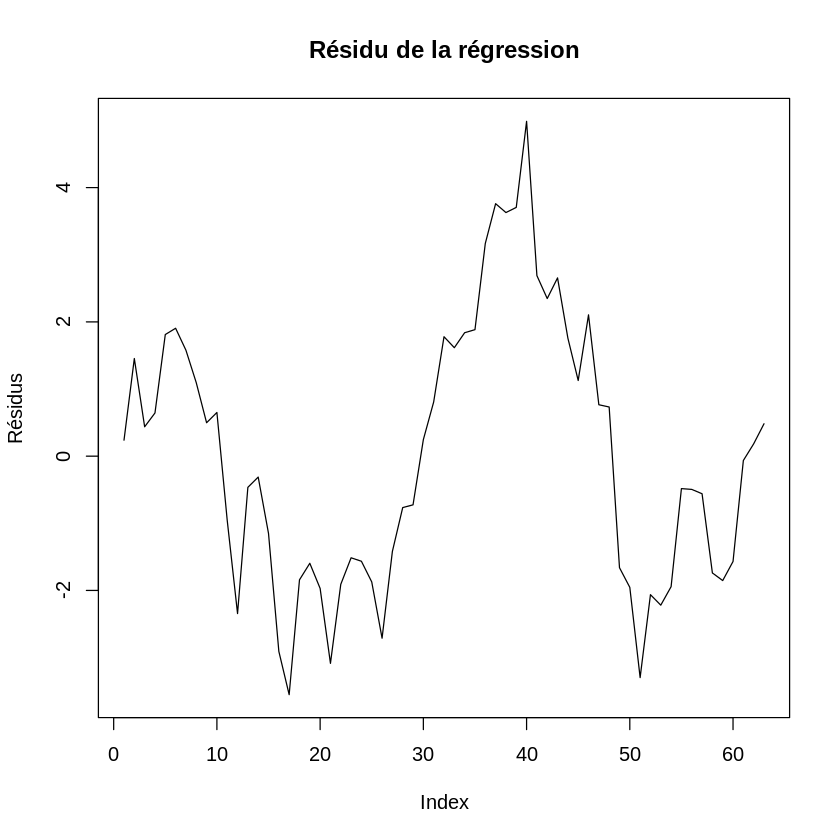

In [15]:
# Créez un index temporel
index <- 1:nrow(DAX_19T1)

# Réalisez la régression de la série temporelle sur l'index temporel
model1 <- lm(DAX_19T1$DAX.DAX_monthly.Adjusted ~ index)

# Les résidus de la régression
Z <- residuals(model1)

# Créez une nouvelle dataframe avec les résidus et la colonne de date
Z_dataframe <- data.frame(Date = DAX_19T1$Date, Residuals = Z)

# Affichez la nouvelle dataframe

head(Z_dataframe)

# Créez un graphique des résidus
plot(Z, type = 'l', main = 'Résidu de la régression', xlab = 'Index', ylab = 'Résidus')


In [16]:
kpss_tau_1<-ur.kpss(y=Z_dataframe$Residuals,type="tau",lags="long")
summary(kpss_tau_1)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 10 lags. 

Value of test-statistic is: 0.0825 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


In [17]:
kpss_tau2<-ur.kpss(y=Z_dataframe$Residuals,type="mu",lags="long")
summary(kpss_tau2)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 10 lags. 

Value of test-statistic is: 0.0825 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


Ainsi notre nouvelle série "Z_dataframe" est bien stationnaire


##Tests sur la période 2010:T1 à 2023:T4

On ajoute maintenant la période du covid qui se caractérise par une explosion temporaire du taux de chômage à des niveaux sans précédent dans l'échantillon. En fin de période, le taux de chômage est revenu à des niveaux comparables à ceux observés avant le covid. L'objectif est voir dans quelle mesure l'inclusion de cette période peut avoir un effet sur les tests de racine unitaire et de stationnarité.

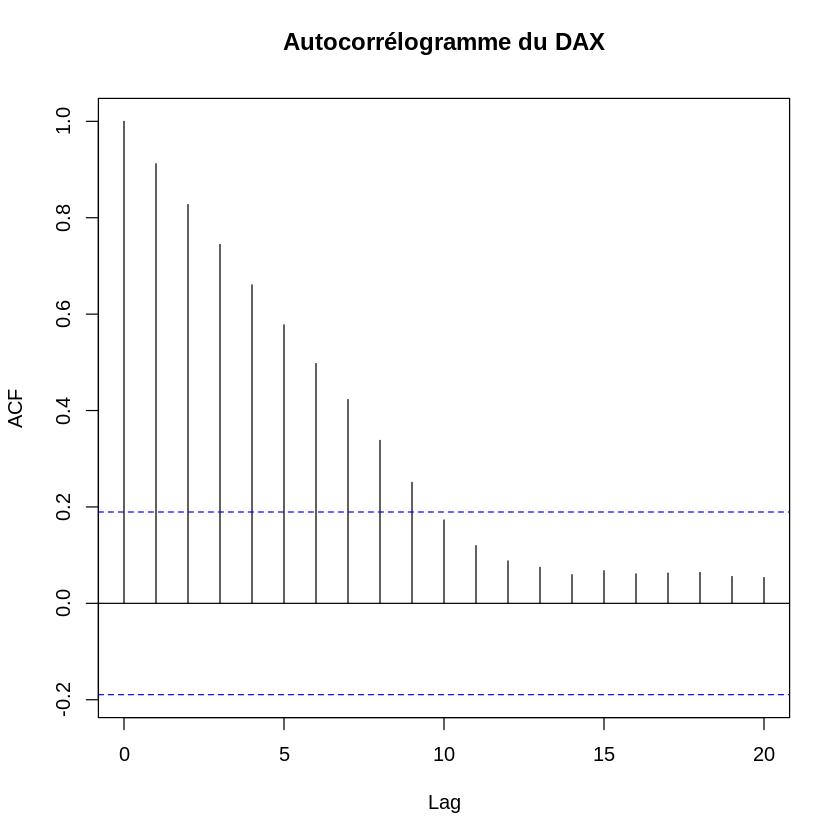

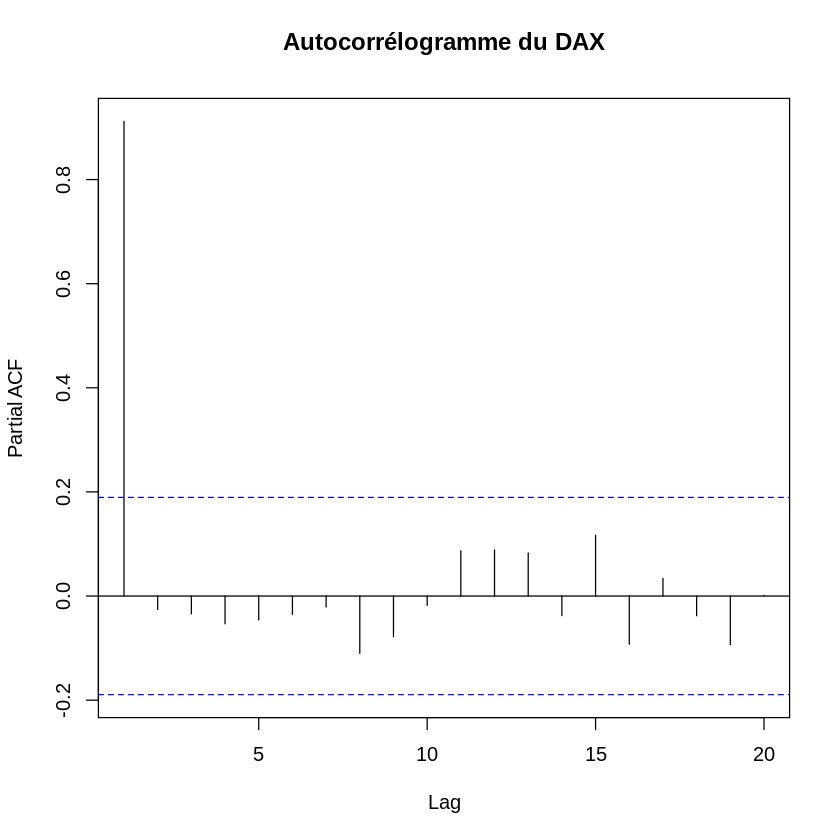

In [18]:
acf_DAX<-acf(x=DAX$DAX.DAX_monthly.Adjusted,main='Autocorrélogramme du DAX')
pacf_DAX<-pacf(x=DAX$DAX.DAX_monthly.Adjusted,main='Autocorrélogramme du DAX')

**Commentaires:**

Les autocorrélogrammes de l'indice DAX sur la période étendue de 2010:T1 à 2023:T3 montrent une forte autocorrélation initiale et une décroissance progressive, similaire à ce qui a été observé dans la période précédant la COVID-19. Cette consistance suggère que la dynamique temporelle de l'indice DAX a maintenu un profil similaire malgré les perturbations économiques, indiquant une persistance de certaines caractéristiques structurelles à travers le temps.

Les autocorrélations significatives s'étendent sur plusieurs lags, mais l'analyse partielle indique que les influences des termes passés deviennent moins significatives après le premier lag. Cela pourrait justifier l'emploi d'un modèle AR(1) pour la modélisation de l'indice DAX, ce qui suggère que, malgré la volatilité et les divers chocs économiques survenus, l'indice conserve une forte dépendance vis-à-vis de sa valeur immédiatement précédente.

##Test de Dickey-Fuller augmenté

###Etape 1 : avec constante et tendance déterministe

On applique le test ADF avec une constante et une tendance déterministe. Le nombre de retards maximum est fixé à 10 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

$$\Delta x_t = c + bt + \rho x_{t-1} + \sum_{j=1}^{10} \gamma_j \Delta x_{t-j} + \varepsilon_t$$


In [19]:
library(urca)

In [20]:
adf1_20<-ur.df(y =DAX$DAX.DAX_monthly.Adjusted,type=c("trend"), lag=10, selectlags = c('AIC'))
summary(adf1_20)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3031 -0.9351  0.1030  0.9803  3.5185 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.743572   1.105086   2.483   0.0149 *
z.lag.1     -0.133030   0.052846  -2.517   0.0136 *
tt           0.010653   0.006616   1.610   0.1108  
z.diff.lag   0.035584   0.104277   0.341   0.7337  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.385 on 92 degrees of freedom
Multiple R-squared:  0.06539,	Adjusted R-squared:  0.03491 
F-statistic: 2.145 on 3 and 92 DF,  p-value: 0.09985


Value of test-statistic is: -2.5173 2.253 3.1684 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.75  4.07
p

**Commentaire:**

Lors de l'application du test Augmented Dickey-Fuller (ADF) pour vérifier la stationnarité d'une série temporelle, nous examinons la statistique de test $ t_{ADF} $. L'hypothèse nulle $ H_0 $ de ce test est que la série temporelle contient une racine unitaire et est donc non stationnaire.

Les résultats de notre test ADF sont les suivants :
La statistique de test obtenue est $ t_{ADF} = -2.5173 $.
Les valeurs critiques pour le seuil de 5% est respectivement tau3 = -3.43.
Puisque notre valeur de test $ t_{ADF} $ n'est pas inférieure à la valeur critique à 5% -2.5173 > -3.43, nous ne rejetons pas l'hypothèse nulle. Cela indique que la série temporelle pourrait être $ I(1) $, impliquant qu'elle nécessite une différenciation pour atteindre la stationnarité.

Parallèlement, nous testons la valeur du coefficient $ b $ avec les hypothèses suivantes :
$$
\left\lbrace
\begin{aligned}
H_{0} &: b = 0 \\
H_{1} &: b \neq 0
\end{aligned}
\right.
$$

Supposons que la valeur calculée de la statistique de test pour $ b $ soit $ \hat{t_{b}} = 1.610 $ et que la valeur critique pour un seuil de 5% soit $VC_{b} = 3.14 $. Puisque $\hat{t_{b}} < VC_{b} $, nous ne rejettons pas  l'hypothèse nulle $H_{0}$ que $b = 0$, et concluons que le coefficient $ b $ est statistiquement n 'est pas significatif.





###Etape 2 : avec constante

$$\Delta x_t =c +  \rho x_{t-1} + \sum_{j=1}^{10} \gamma_j \Delta x_{t-j} + \varepsilon_t$$

In [21]:
adf2_20<-ur.df(y = DAX$DAX.DAX_monthly.Adjusted,type=c("drift"), lag=10, selectlags = c('AIC'))
summary(adf2_20)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1651 -0.9537  0.0123  1.0890  3.6910 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.03352    1.02192   1.990   0.0495 *
z.lag.1     -0.07889    0.04112  -1.919   0.0581 .
z.diff.lag   0.01319    0.10423   0.127   0.8995  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.396 on 93 degrees of freedom
Multiple R-squared:  0.03905,	Adjusted R-squared:  0.01839 
F-statistic:  1.89 on 2 and 93 DF,  p-value: 0.1569


Value of test-statistic is: -1.9187 2.0482 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


Nous avons conduit un test de Dickey-Fuller augmenté (ADF) avec une constante (sans tendance) pour déterminer si la série temporelle est non stationnaire, c'est-à-dire qu'elle possède une racine unitaire. La statistique de test ADF obtenue est $ t_{ADF} = -1.9187 $. La valeur critique pour un niveau de signification de 5\% est $ \tau_{2} = -2.88 $. Puisque $ t_{ADF} > \tau_{2} $, nous ne rejetons pas l'hypothèse nulle de présence d'une racine unitaire.

En ce qui concerne la constante dans le modèle, nous testons les hypothèses suivantes :
$$
H_{0}: c = 0 \quad \text{vs} \quad H_{1}: c \neq 0
$$

La statistique de test pour l'intercept est $ \hat{t_{c}} = 1.990 $, et la valeur critique pour un niveau de signification de 5\% est $ VC_{c} = 2.86 $. Puisque $\hat{t_{c}} < VC_{c} $, l'hypothèse nulle que $ c = 0 $ n'est pas rejetée, suggérant que l'intercept n'est pas statistiquement significatif.

En conclusion, l'analyse ADF suggère que la série est probablement non stationnaire, et l'intercept de la série n'est pas statistiquement différent de zéro au seuil de 5\%.


###Etape 3 : sans constante ni tendance déterministe

$$\Delta x_t =\rho x_{t-1} + \sum_{j=1}^{10} \gamma_j \Delta x_{t-j} + \varepsilon_t$$

In [22]:
adf3_20<-ur.df(y = DAX$DAX.DAX_monthly.Adjusted,type=c("none"), lag=10, selectlags = c('AIC'))
summary(adf3_20)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0448 -0.8338  0.0857  1.0173  3.7301 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
z.lag.1     0.002125   0.005835   0.364    0.717
z.diff.lag -0.031217   0.103399  -0.302    0.763

Residual standard error: 1.418 on 94 degrees of freedom
Multiple R-squared:  0.002174,	Adjusted R-squared:  -0.01906 
F-statistic: 0.1024 on 2 and 94 DF,  p-value: 0.9027


Value of test-statistic is: 0.3641 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


**Commentaire**

L'application du test de Dickey-Fuller augmenté (ADF) sans tendance ni intercept nous permet de tester la présence d'une racine unitaire dans une série temporelle. Le résultat principal de ce test est la statistique de test ADF, que nous comparons aux valeurs critiques pour déterminer si la série temporelle est stationnaire ou non.

Dans notre cas, la statistique de test ADF est $ t_{ADF} = 0.3641 $. La valeur critique correspondante pour un seuil de 5\% est $\tau = -1.95 $. Puisque notre statistique de test est supérieure à la valeur critique $ t_{ADF} > \tau $, nous ne rejetons pas l'hypothèse nulle d'une racine unitaire. En conséquence, il n'y a pas suffisamment de preuves pour affirmer que la série temporelle est stationnaire au niveau de signification de 5\%.



### **Conclusion**

Sur la base des trois tests, nous ne pouvons pas rejeter l'hypothèse nulle de présence d'une racine unitaire pour aucune des spécifications. Cela suggère que la série n'est pas stationnaire, que ce soit en tendance stationnaire ou en différences stationnaires (DS), aux niveaux de signification conventionnels. La série semble avoir une racine unitaire, ce qui indique qu'elle pourrait nécessiter une différenciation pour atteindre la stationnarité, suggérant qu'elle est une série intégrée d'ordre 1, I(1). Cependant, il est important de prendre en compte le contexte et d'autres ruptures structurelles potentielles ou tests avant de finaliser la conclusion.

## ***Test de stationnarité de KPSS¶***

### Stationnarité autour d'une tendance déterministe

In [23]:
kpss_tau_20<-ur.kpss(y=DAX$DAX.DAX_monthly.Adjusted,type="tau",lags="long")
summary(kpss_tau_20)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 12 lags. 

Value of test-statistic is: 0.0429 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Le test KPSS de type "tau"** a révélé une statistique de test de 0.0429. Par rapport aux valeurs critiques correspondant à des niveaux de signification de 10%, 5%, 2.5%, et 1%, cette statistique est inférieure dans tous les cas, ce qui conduit à ne pas rejeter l'hypothèse nulle. Cela suggère que la série temporelle est stationnaire autour d'une tendance, ne montrant aucune preuve de présence d'une racine unitaire ou d'une tendance stochastique.

### Stationnarité autour d'une constante


In [24]:
kpss_mu_20<-ur.kpss(y=DAX$DAX.DAX_monthly.Adjusted,type="mu",lags="long")
summary(kpss_mu_20)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 12 lags. 

Value of test-statistic is: 0.5704 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


**Le test KPSS de type "mu"** a produit une statistique de test de 0.5704. En comparaison avec les valeurs critiques standards pour les niveaux de signification de 10% (0.347) et 5% (0.463), notre statistique de test suggère un rejet de l'hypothèse nulle de stationnarité autour d'une moyenne constante. Cela implique que la série peut ne pas être stationnaire autour d'une moyenne constante aux niveaux de signification de 10% et 5%. En revanche, aux niveaux de signification de 2.5% et 1%, l'hypothèse nulle ne peut être rejetée, indiquant une possibilité de stationnarité.



##Stationnarisation de la série:

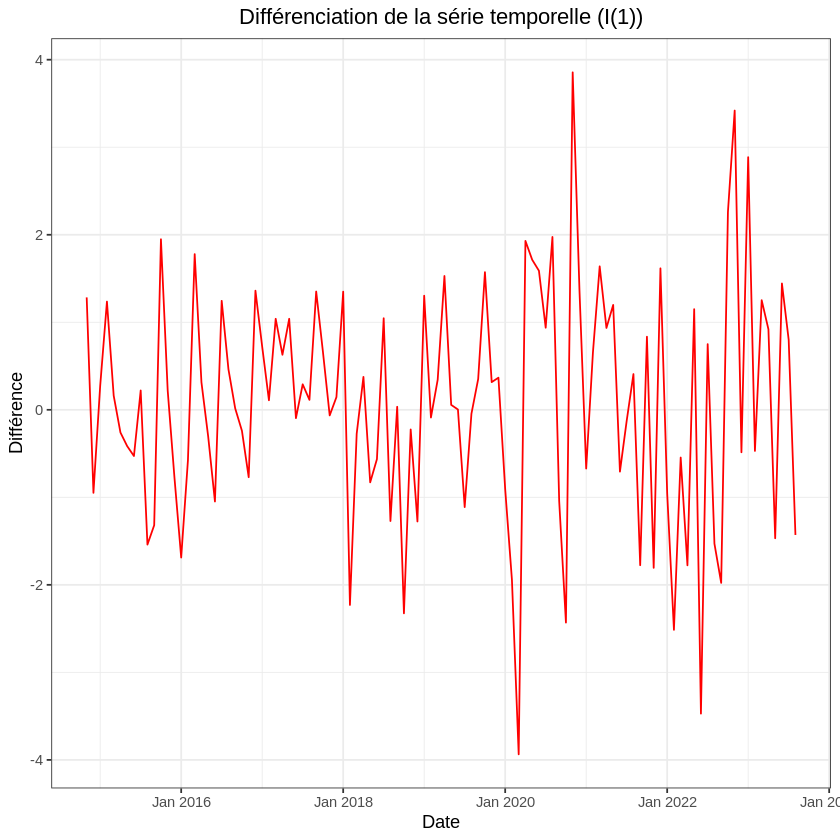

In [25]:
# Calcul des premières différences de la série temporelle
DAX_diff_20 <- diff(DAX$DAX.DAX_monthly.Adjusted, differences = 1)

# Création d'un data frame pour ggplot
df <- data.frame(Date = DAX$Date[-1], DAX_diff = DAX_diff_20)

# Création de l'objet ggplot
p_diff <- ggplot(data = df, aes(x = Date, y = DAX_diff)) +
  geom_line(colour = 'red') +
  ggtitle('Différenciation de la série temporelle (I(1))') +
  xlab('Date') +
  ylab('Différence') +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

# Affichage du graphique
print(p_diff)

#***$II.CPI$***

# **Les representations graphiques et autocorrélogrammes simples et partiels des séries**

Warning message:
“Use of `CPI$Value` is discouraged.
ℹ Use `Value` instead.”


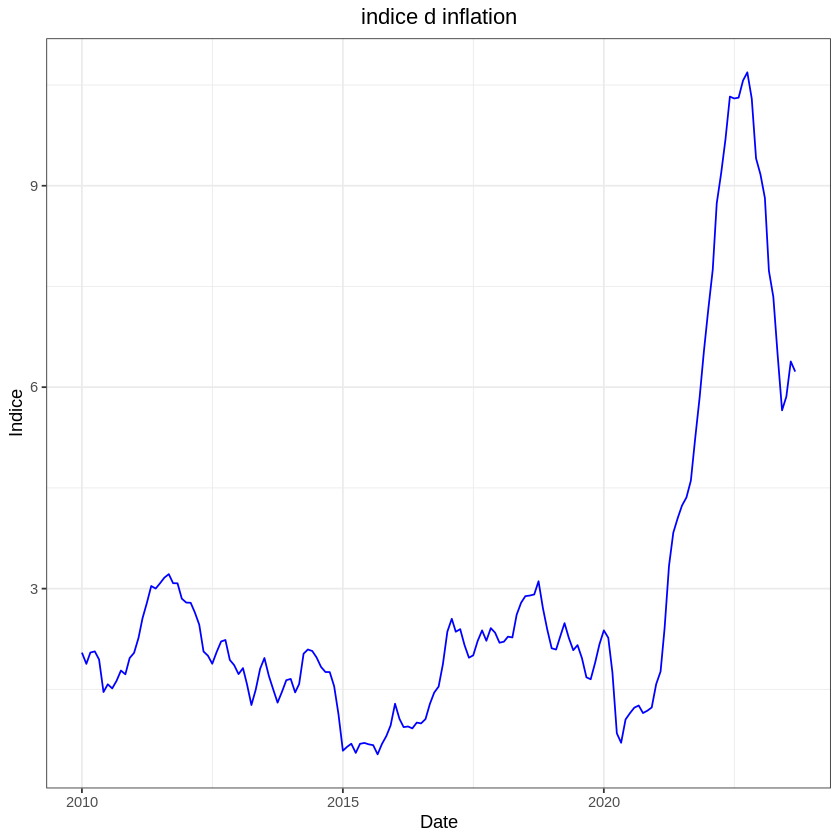

In [26]:
C1<-ggplot(data=CPI,aes(x=Date,y=CPI$Value))+geom_line(colour='blue')+ggtitle('indice d inflation')+xlab('Date')+ylab('Indice')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
C1

***Commentaire:***

Le graphique de l'indice d'inflation montre une stabilité initiale suivie d'une tendance croissante, avec une forte hausse autour de 2020, probablement due à l'impact de la COVID-19. Cette volatilité suggère des changements économiques sous-jacents significatifs. Bien qu'il y ait une baisse après le pic, l'inflation reste préoccupante. Le graphique indique une non-stationnarité, caractérisée par une tendance et une volatilité qui varient dans le temps, ce qui signifie que les propriétés statistiques de la série, comme la moyenne et la variance, ne sont pas constantes sur la période observée.



##**Tests sans la période Covid : 2010:T1 à 2019:T4**



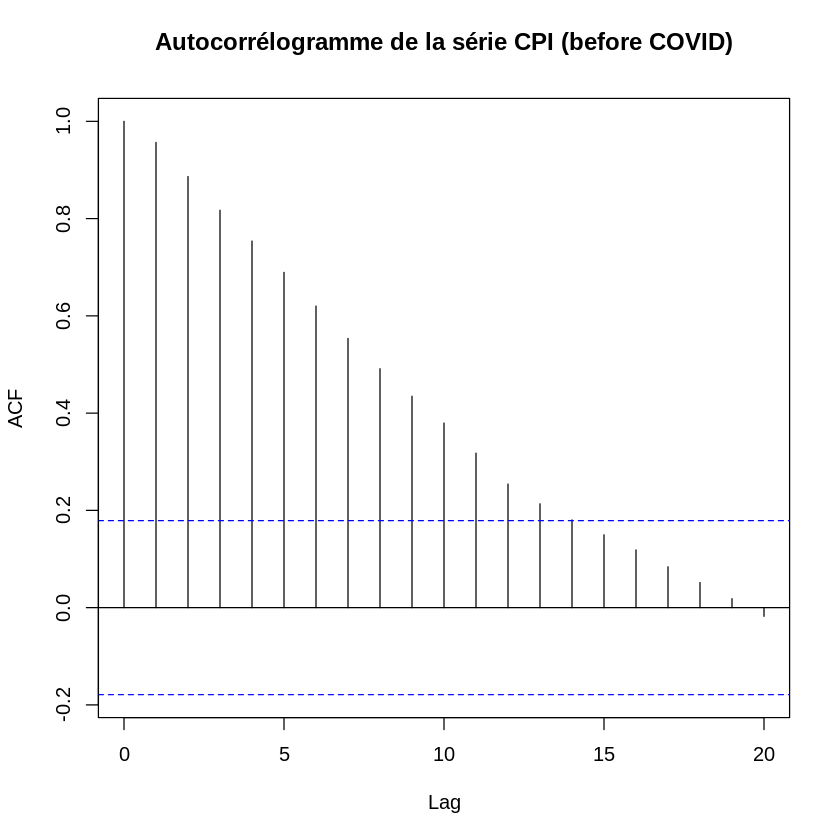

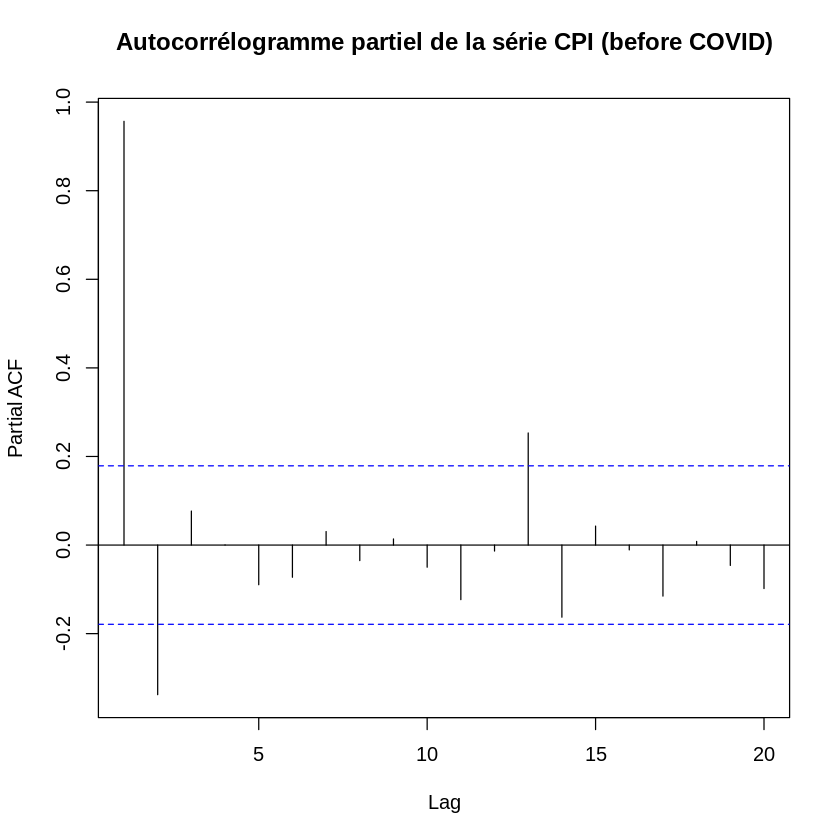

In [27]:
cpi_before_covid <- CPI[CPI$Date < "2020-01-01", ]
# Autocorrélogramme simple
acf(cpi_before_covid$Value, main = 'Autocorrélogramme de la série CPI (before COVID)')

# Autocorrélogramme partiel
pacf(cpi_before_covid$Value, main = 'Autocorrélogramme partiel de la série CPI (before COVID)')



**Commentaire:**

Après avoir analysé les deux graphiques – l'autocorrélogramme et l'autocorrélogramme partiel de la série CPI avant la période COVID:

* L'autocorrélogramme montre une décroissance progressive des corrélations au fur et à mesure que le lag augmente, ce qui indique une dépendance décroissante des observations actuelles par rapport aux observations passées. Cela suggère qu'il y a une forte corrélation à court terme dans les données.

* l'autocorrélogramme partiel, qui montre les corrélations après avoir éliminé l'effet des lags intermédiaires, ne présente pas de corrélations significatives à part au lag zéro (ce qui est toujours le cas). Cela indique que, une fois l'effet des autres lags retiré, il n'y a pas de corrélation directe forte entre les observations séparées par un ou plusieurs lags.

La conclusion globale est que bien que la série CPI avant COVID montre une autocorrélation initiale significative, elle semble ne pas avoir de dépendances directes significatives à des lags plus élevés. Cela suggère que la série pourrait être modélisée efficacement avec un modèle autorégressif d'ordre 1 ou 2 (AR(1) ou AR(2)) pour les prévisions. De plus, l'absence de corrélations partielles significatives aux lags supérieurs laisse entendre que la série est probablement stationnaire ou qu'elle peut être rendue stationnaire avec des transformations simples, comme la différenciation. Cette stationnarité est une condition préalable pour de nombreux modèles de prévision en série temporelle.

##Test de Dickey-Fuller augmenté :

###Etape1:avec constante et tendance déterministe

In [28]:
adf1_cpi_before <- ur.df(y = cpi_before_covid$Value, type = c("trend"), lag = 12, selectlags = c('AIC'))
summary(adf1_cpi_before)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42464 -0.10592  0.01598  0.13325  0.38202 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.876e-02  6.592e-02   1.498   0.1371    
z.lag.1     -5.406e-02  2.526e-02  -2.140   0.0347 *  
tt           9.584e-05  5.682e-04   0.169   0.8664    
z.diff.lag   4.094e-01  9.079e-02   4.509 1.73e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.181 on 103 degrees of freedom
Multiple R-squared:  0.1812,	Adjusted R-squared:  0.1573 
F-statistic: 7.596 on 3 and 103 DF,  p-value: 0.0001225


Value of test-statistic is: -2.1405 1.5677 2.3482 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3

Nous examinons la stationnarité de la série temporelle CPI avant COVID en utilisant un test de Dickey-Fuller augmenté (ADF) qui inclut à la fois une constante (intercept) et une tendance linéaire (trend). La statistique du test ADF est utilisée pour tester l'hypothèse nulle d'une racine unitaire, indiquant une non-stationnarité.

La statistique de test ADF est $ t_{ADF} = -2.1405 $, et la valeur critique pour un niveau de significativité de 5\% est $ \tau_{5\%} = -3.43 $. Étant donné que $ t_{ADF} > \tau_{5\%} $, nous ne pouvons pas rejeter l'hypothèse nulle au niveau de 5\%, ce qui indique que la série CPI avant COVID est non stationnaire.

En outre, pour la tendance linéaire, la statistique de test est $ t_{tt} = 0.169 < VC_{tt}=3.14 $ avec une valeur p de $ p_{tt} = 0.8664 $. Avec une valeur p bien au-dessus du seuil de 0.05, nous concluons que la tendance linéaire n'est pas statistiquement significative, indiquant qu'il n'y a pas suffisamment de preuves pour affirmer la présence d'une tendance linéaire dans la série CPI avant COVID au niveau de significativité de 5\%.

###ETAPE2: avec constante:

In [29]:
adf2_cpi_before <- ur.df(y = cpi_before_covid$Value, type = c("drift"), lag = 12, selectlags = c('AIC'))
summary(adf2_cpi_before)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4212 -0.1080  0.0176  0.1318  0.3804 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10573    0.05111   2.069   0.0411 *  
z.lag.1     -0.05440    0.02506  -2.171   0.0322 *  
z.diff.lag   0.40958    0.09036   4.533 1.56e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1801 on 104 degrees of freedom
Multiple R-squared:  0.1809,	Adjusted R-squared:  0.1652 
F-statistic: 11.49 on 2 and 104 DF,  p-value: 3.11e-05


Value of test-statistic is: -2.1707 2.3593 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


**Commentaire:**




***Test sur la racine unitaire :***

Le test de Dickey-Fuller Augmenté est utilisé pour déterminer si une série temporelle possède une racine unitaire, ce qui indiquerait que la série n'est pas stationnaire :

À un niveau de signification de $5\%$, la valeur critique est $-2.88$. Comme la statistique de test est $-2.1707$, qui est supérieure à la valeur critique, nous ne pouvons pas rejeter l'hypothèse nulle de la présence d'une racine unitaire. Par conséquent, la série temporelle est probablement non stationnaire.

***Test de la constante ***

Pour tester l'hypothèse nulle que la constante est égale à zéro contre l'alternative que la constante est différente de zéro, nous regardons le coefficient de l'intercept et sa statistique t :

$$
H_0: c = 0 \quad \text{contre} \quad H_1: c \neq 0
$$

La statistique t pour l'intercept est de $2.069$ avec une valeur p de $0.0411$. À un niveau de signification de $5\%$, la valeur critique est $2.86$ (selon l'instruction donnée). Puisque $2.069$ est inférieur à $2.85$, nous ne rejetons pas l'hypothèse nulle à ce niveau de signification.


###Etape3:Sans constante ni tendance déterministe :

In [30]:
adf3_cpi_before <- ur.df(y = cpi_before_covid$Value, type = c("none"), lag = 12, selectlags = c('AIC'))
summary(adf3_cpi_before)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47375 -0.11872  0.03598  0.13930  0.37009 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.004660   0.008613  -0.541   0.5897    
z.diff.lag1  0.445643   0.096986   4.595 1.22e-05 ***
z.diff.lag2 -0.164914   0.097226  -1.696   0.0928 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1813 on 104 degrees of freedom
Multiple R-squared:  0.1702,	Adjusted R-squared:  0.1463 
F-statistic: 7.111 on 3 and 104 DF,  p-value: 0.0002158


Value of test-statistic is: -0.541 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


**Commentaire:**


Nous avons réalisé un test de Dickey-Fuller augmenté pour examiner la présence d'une racine unitaire dans notre série temporelle. Les résultats sont les suivants :

La statistique de test calculée est de $t_{ADF}=-0.541$. À un niveau de signification de 5%, la valeur critique est $-1.95$. Puisque notre statistique de test est de $-0.541$, qui est plus élevée que la valeur critique, nous ne pouvons pas rejeter l'hypothèse nulle d'une racine unitaire. Cela suggère que la série temporelle pourrait ne pas être stationnaire.

####**Conclusion** :
Aucun des tests ADF n'a permis de rejeter l'hypothèse nulle de présence d'une racine unitaire pour le CPI avant la période de COVID-19. Cela suggère que la série n'est pas stationnaire. Malgré le fait que les modèles sont statistiquement significatifs, la présence de racine unitaire indique que la série est probablement intégrée d'ordre 1, I(1), et nécessiterait une différenciation pour atteindre la stationnarité. Cependant, une seule différenciation pourrait ne pas suffire à rendre la série stationnaire s'il existe une tendance. Dans ce cas, un test de stationnarité autour d'une tendance pourrait être approprié pour une analyse plus approfondie.

###Test de stationnarité de KPSS:

### Stationnarité autour d'une tendance déterministe

In [31]:
kpss_tau_cpi_before <- ur.kpss(y = cpi_before_covid$Value, type = "tau", lags = "long")
summary(kpss_tau_cpi_before)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 12 lags. 

Value of test-statistic is: 0.1557 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Le test KPSS autour d'une tendance (type "tau") :

La statistique de test est de $LM_{KPSS}$=0.1557.
Ici aussi, par rapport aux valeurs critiques pour des niveaux de signification de 10% à 1%, la statistique de test est inférieure dans tous les cas. Par conséquent, l'hypothèse nulle de stationnarité autour d'une tendance n'est pas rejetée, ce qui suggère que la série temporelle présente une tendance déterministe plutôt qu'une tendance stochastique.

###Stationnarité autour d'une constante

In [32]:
kpss_mu_cpi_before <- ur.kpss(y = cpi_before_covid$Value, type = "mu", lags = "long")
summary(kpss_mu_cpi_before)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 12 lags. 

Value of test-statistic is: 0.1586 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


Le test KPSS autour d'une constante (type "mu") :

La statistique de test est de $LM_{KPSS}$=0.1586.
À comparer avec les valeurs critiques pour les niveaux de signification conventionnels, la statistique de test est inférieure à la valeur critique pour un niveau de signification de 2.5% (0.574) et de 1% (0.739), ce qui implique que nous ne rejetons pas l'hypothèse nulle de stationnarité à ces niveaux. Cela indique que la série est potentiellement stationnaire autour d'une constante, sans tendance stochastique manifeste.

##Correction de la serie :


Le test de KPSS indique la stationnarité et ADF indique non-stationnarité : Cela peut signifier que la série a une tendance stationnaire mais contient aussi une racine unitaire. Dans ce cas, la différenciation pourrait être nécessaire pour obtenir une série pleinement stationnaire.

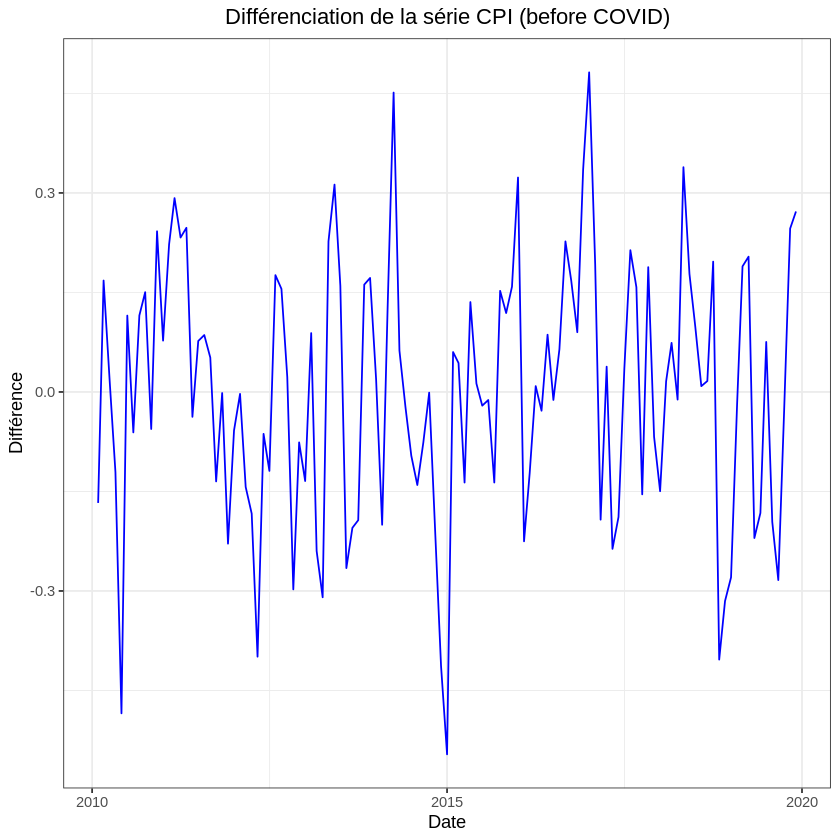

In [33]:
# Calcul des premières différences de la série temporelle
cpi_diff_before <- diff(cpi_before_covid$Value, differences = 1)

# Création d'un data frame pour ggplot
df_diff_before <- data.frame(Date = cpi_before_covid$Date[-1], CPI_diff = cpi_diff_before)

# Création de l'objet ggplot pour visualiser les différences
library(ggplot2)
p_diff_before <- ggplot(data = df_diff_before, aes(x = Date, y = CPI_diff)) +
  geom_line(colour = 'blue') +
  ggtitle('Différenciation de la série CPI (before COVID)') +
  xlab('Date') +
  ylab('Différence') +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

# Affichage du graphique des différences
print(p_diff_before)


##Test sur la période 2010:T1 à 2023:T3

On ajoute maintenant la période du covid qui se caractérise par une explosion temporaire du taux de chômage à des niveaux sans précédent dans l'échantillon. En fin de période, le taux de chômage est revenu à des niveaux comparables à ceux observés avant le covid. L'objectif est voir dans quelle mesure l'inclusion de cette période peut avoir un effet sur les tests de racine unitaire et de stationnarité.

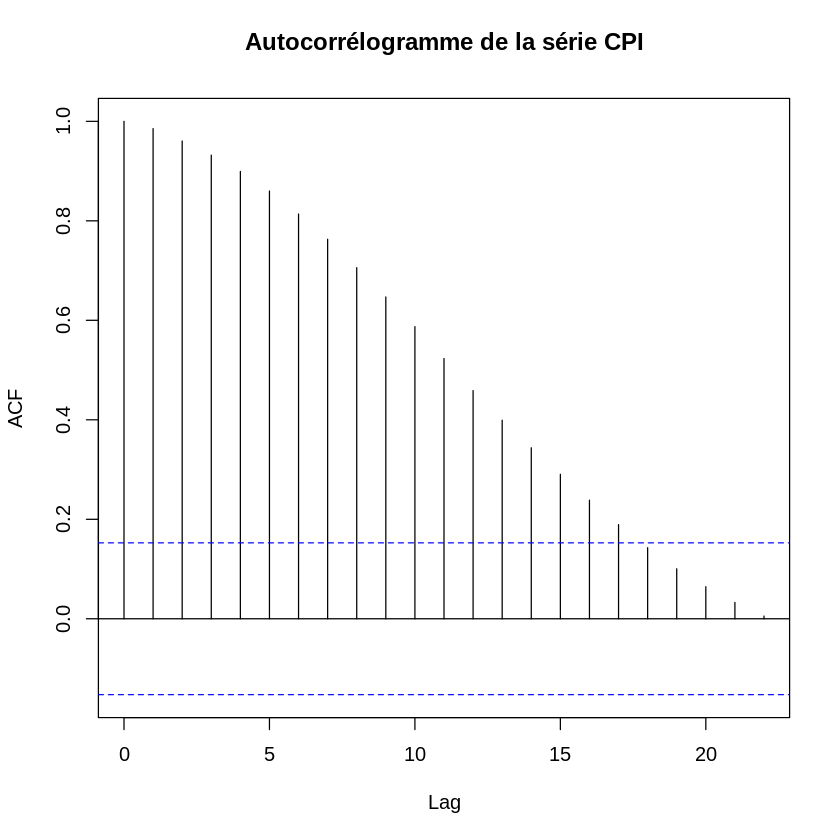

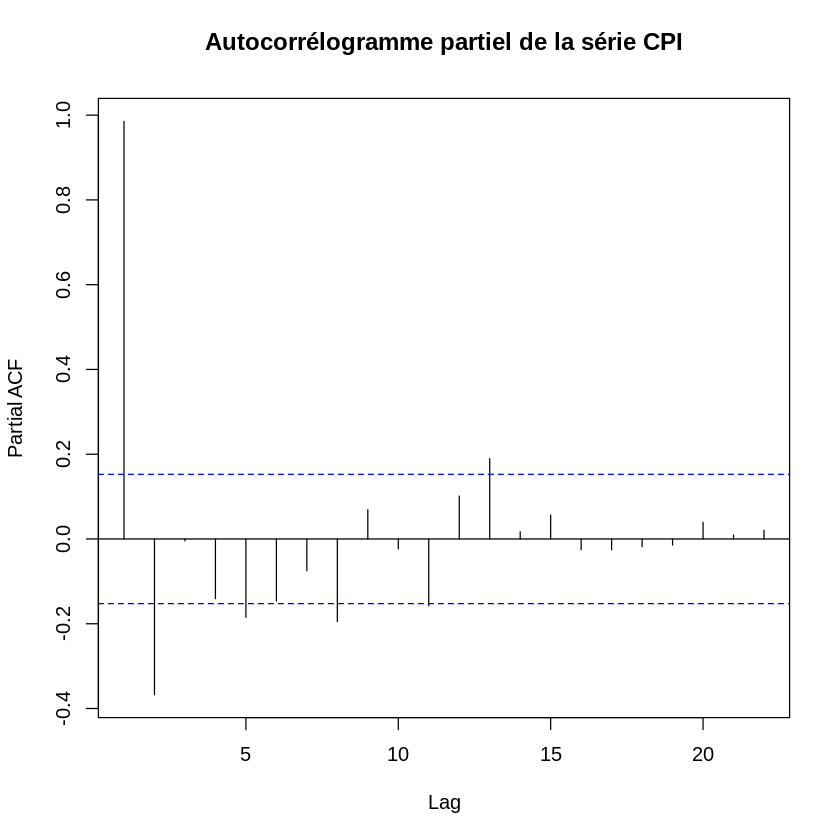

In [34]:
# Autocorrélogramme simple
acf(CPI$Value, main = 'Autocorrélogramme de la série CPI')

# Autocorrélogramme partiel
pacf(CPI$Value, main = 'Autocorrélogramme partiel de la série CPI')

**Commentaire:**

Après avoir analysé les deux graphiques – l'autocorrélogramme et l'autocorrélogramme partiel de la série CPI:

* L'autocorrélogramme simple montre des autocorrélations décroissantes mais positives sur de nombreux lags, ce qui suggère une corrélation notable entre les observations courantes et leurs valeurs passées sur une période prolongée. Cela peut indiquer une non-stationnarité de la série, comme cela est souvent le cas avec les données économiques telles que l'inflation, qui peuvent être affectées par des tendances à long terme et des cycles économiques.


* L'autocorrélogramme partiel indique que les corrélations partielles sont généralement faibles et irrégulières, ce qui implique que les valeurs antérieures de la série n'ont pas une forte influence prédictive directe après que les effets des autres lags aient été pris en compte. Ceci suggère qu'un modèle AR(1) pourrait être suffisant pour modéliser la série CPI.

##Test de Dickey Fuller augmenté :

###Etape 1: avec constante et tendence déterministe :

In [35]:
adf1_cpi <- ur.df(y = CPI$Value, type = c("trend"), lag = 13, selectlags = c('AIC'))
summary(adf1_cpi)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53337 -0.10953  0.00904  0.11892  0.74247 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0095398  0.0449016  -0.212  0.83207    
z.lag.1      -0.0245531  0.0149019  -1.648  0.10175    
tt            0.0009592  0.0005054   1.898  0.05982 .  
z.diff.lag1   0.7200032  0.0848889   8.482 3.45e-14 ***
z.diff.lag2  -0.1650069  0.0926849  -1.780  0.07728 .  
z.diff.lag3   0.1417172  0.0933865   1.518  0.13147    
z.diff.lag4  -0.0901828  0.0937964  -0.961  0.33803    
z.diff.lag5   0.1714801  0.0958725   1.789  0.07592 .  
z.diff.lag6  -0.0036277  0.0975131  -0.037  0.97038    
z.diff.lag7   0.1511015  0.1019642   1.482  0.14070    
z.diff.lag8  -0.1326979  0.10091

Nous examinons la stationnarité de la série temporelle CPI en utilisant un test de Dickey-Fuller augmenté (ADF) qui inclut à la fois une constante (intercept) et une tendance linéaire (trend). La statistique du test ADF est utilisée pour tester l'hypothèse nulle d'une racine unitaire, indiquant une non-stationnarité.

La statistique de test ADF est $ t_{ADF} = -1.6476 $, et la valeur critique pour un niveau de significativité de 5\% est $ \tau_{5\%} = -3.43 $. Étant donné que $ t_{ADF} > \tau_{5\%} $, nous ne pouvons pas rejeter l'hypothèse nulle au niveau de 5\%, ce qui indique que la série CPI avant COVID est non stationnaire.

***Test sur le coefficient de la tendance:***
$$
H_0: b = 0 \quad \text{contre} \quad H_1: b \neq 0
$$
pour la tendance linéaire, la statistique de test est $ t_{tt} = 1.898 < VC_{tt}=3.14 $. Nous concluons que la tendance linéaire n'est pas statistiquement significative.

On passe au test de Dickey Fuller sur la constante.

###Etape 2 : avec constante :

In [36]:
adf2_cpi <- ur.df(y = CPI$Value, type = c("drift"), lag = 13, selectlags = c('AIC'))
summary(adf2_cpi)



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48387 -0.12227 -0.00165  0.12709  0.75412 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.04241    0.03593   1.180  0.23997    
z.lag.1      -0.01252    0.01361  -0.919  0.35947    
z.diff.lag1   0.73431    0.08536   8.603 1.68e-14 ***
z.diff.lag2  -0.16934    0.09354  -1.810  0.07244 .  
z.diff.lag3   0.13818    0.09426   1.466  0.14496    
z.diff.lag4  -0.09476    0.09466  -1.001  0.31858    
z.diff.lag5   0.16991    0.09678   1.756  0.08141 .  
z.diff.lag6  -0.01262    0.09833  -0.128  0.89807    
z.diff.lag7   0.14757    0.10292   1.434  0.15390    
z.diff.lag8  -0.14551    0.10165  -1.431  0.15459    
z.diff.lag9  -0.07372    0.09937  -0.742  0.45943    
z.dif

**Commentaire:**




##### Test sur la racine unitaire :

Le test de Dickey-Fuller Augmenté est utilisé pour déterminer si une série temporelle possède une racine unitaire, ce qui indiquerait que la série n'est pas stationnaire.:

À un niveau de signification de $5\%$, la valeur critique est $-2.88$. Comme la statistique de test est $-0.9195$, qui est supérieure à la valeur critique, nous ne pouvons pas rejeter l'hypothèse nulle de la présence d'une racine unitaire. Par conséquent, la série temporelle est probablement non stationnaire.

##### Test de la constante (Intercept)

Pour tester l'hypothèse nulle que la constante est égale à zéro contre l'alternative que la constante est différente de zéro, nous regardons le coefficient de l'intercept et sa statistique t :

$$
H_0: c = 0 \quad \text{contre} \quad H_1: c \neq 0
$$

La statistique t pour l'intercept est de $1.180$. À un niveau de signification de $5\%$, la valeur critique est $2.86$. Puisque $1.180$ est inférieur à $2.86$, nous ne rejetons pas l'hypothèse nulle à ce niveau de signification.


####Test de Bulle Spéculative:

On estime la régression ADF :
$$
x_{t} = \mu_{x} + \rho x_{t-1} + \sum_{j=1}^{p} \phi_{j} \Delta x_{t-j} + \epsilon_{x,t}
$$
avec $\epsilon_{x,t} \sim NID(0,\sigma^{2}_{x})$.

On teste l'hypothèse nulle de racine unitaire contre l'hypothèse alternative d'une racine explosive. On a donc un test unilatéral du coté droit.

$$
\left\lbrace
\begin{array}{l}
H_{0} : \rho =1 \Rightarrow \,racine\,unitaire\\
H_{1} : \rho>1\, \Rightarrow \,racine\,explosive
\end{array}
\right.
$$

en faisant des régressions forward sur des fractions $r_{0} \leq r\leq 1$ des observations, on obtient la statistique

$$SADF(r_{0})=\sup_{r \in [r_{0},1]} ADF_{r}$$ où $ADF = \frac{\hat{\rho}-1}{\hat{\sigma}_{\hat{\rho}}}$

In [37]:
install.packages("exuber")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rngtools’, ‘iterators’, ‘snow’, ‘doRNG’, ‘doSNOW’, ‘foreach’, ‘Rcpp’, ‘RcppArmadillo’




In [38]:
library(exuber)
radf_D_PWY <-radf(CPI$Value,lag=1)
sprintf("La statistique du test SADF est %f",radf_D_PWY$sadf)
psy_minw(CPI$Value)


Attaching package: ‘exuber’


The following objects are masked from ‘package:zoo’:

    index, index<-




[1] "La statistique du test SADF est 1.932600"

[1] 24

In [39]:
radf_crit$n24$sadf_cv

90%       95%       99% 
0.6348406 0.9594374 1.8055611

La statistique du test $SADF =1.932600 $ est supérieur aux trois seuils de rejet. On peut pas  l'hypothèse nulle de racine unitaire contre celle d'une dynamique explosive.

###Etape3 : sans constante ni tendance déterministe:

In [40]:
adf3_cpi <- ur.df(y = CPI$Value, type = c("none"), lag = 13, selectlags = c('AIC'))
summary(adf3_cpi)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47543 -0.11537  0.01895  0.14843  0.75687 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
z.lag.1       0.001227   0.007061   0.174   0.8624    
z.diff.lag1   0.719539   0.084557   8.510 2.72e-14 ***
z.diff.lag2  -0.167220   0.093656  -1.785   0.0764 .  
z.diff.lag3   0.142924   0.094306   1.516   0.1319    
z.diff.lag4  -0.099019   0.094725  -1.045   0.2977    
z.diff.lag5   0.161842   0.096678   1.674   0.0964 .  
z.diff.lag6  -0.012348   0.098466  -0.125   0.9004    
z.diff.lag7   0.131606   0.102171   1.288   0.1999    
z.diff.lag8  -0.157141   0.101319  -1.551   0.1232    
z.diff.lag9  -0.088813   0.098682  -0.900   0.3697    
z.diff.lag10  0.263123   0.101436   2.594   0.010

**Commentaire:**


Nous avons réalisé un test de Dickey-Fuller augmenté pour examiner la présence d'une racine unitaire dans notre série temporelle. Les résultats sont les suivants :

La statistique de test calculée est de $t_{ADF}=0.1737$. À un niveau de signification de 5%, la valeur critique est $-1.95$. Puisque notre statistique de test est de $-0.1737$, qui est plus élevée que la valeur critique, nous ne pouvons pas rejeter l'hypothèse nulle d'une racine unitaire. Cela suggère que la série temporelle pourrait ne pas être stationnaire.

####**Conclusion :**

Pour tous les tests, l'hypothèse nulle d'une racine unitaire n'est pas rejetée, ce qui suggère que la série CPI est non stationnaire sur toute la période analysée. Même si les coefficients de régression sont statistiquement significatifs, cela n'implique pas la stationnarité de la série. Il semble que le CPI soit une série intégrée d'ordre 1, I(1), nécessitant des différences pour atteindre la stationnarité. Cependant, la présence de coefficients significatifs pour la tendance et la dérive dans les tests pourrait impliquer une dynamique de tendance sous-jacente qui mérite une enquête plus approfondie avec d'autres tests ou modèles économétriques.

##Test de stationnarité KPSS:

###Stationnarité autour d'une tendance déterministe:

In [41]:
kpss_tau_cpi <- ur.kpss(y = CPI$Value, type = "tau", lags = "long")
summary(kpss_tau_cpi)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 13 lags. 

Value of test-statistic is: 0.2002 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Le test KPSS autour d'une tendance (type "tau") :

La statistique de test est de $LM_{KPSS}=0.2002$.
La statistique de test est supérieur à $VC_{5\%}$=0.146. Par conséquent, l'hypothèse nulle de stationnarité autour d'une tendance est rejetée, ce qui suggère que la série temporelle n'est pas stationnaire autour d'une tendance déterministe.


###Stationnarité autour d'une constante

In [42]:
kpss_mu_cpi <- ur.kpss(y = CPI$Value, type = "mu", lags = "long")
summary(kpss_mu_cpi)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 13 lags. 

Value of test-statistic is: 0.5484 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


Le test KPSS autour d'une constante (type "mu") :

La statistique de test est de $LM_{KPSS}=0.5484$.
La statistique de test est supérieur à $VC_{5\%}$=0.463. Par conséquent, l'hypothèse nulle de stationnarité autour d'une constante est rejetée, ce qui suggère que la série temporelle n'est pas stationnaire autour d'une constante.

##Differenciation

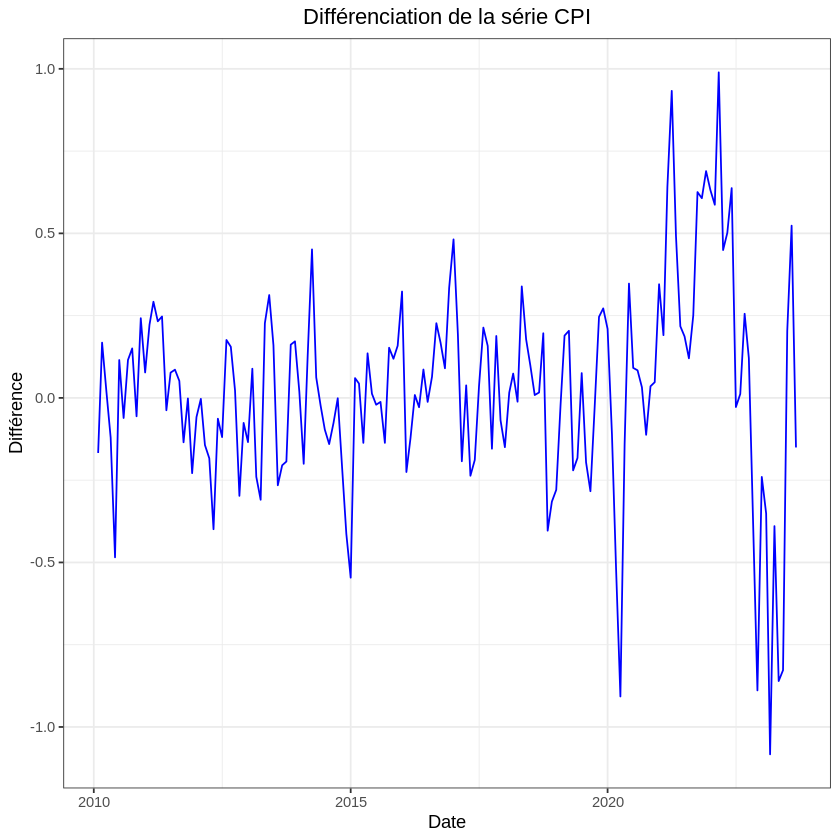

In [43]:

# Calcul des premières différences de la série temporelle CPI
cpi_diff <- diff(CPI$Value, differences = 1)

# Création d'un data frame pour ggplot
df_diff <- data.frame(Date = CPI$Date[-1], CPI_diff = cpi_diff)

# Création de l'objet ggplot pour visualiser les différences
p_diff <- ggplot(data = df_diff, aes(x = Date, y = CPI_diff)) +
  geom_line(colour = 'blue') +
  ggtitle('Différenciation de la série CPI') +
  xlab('Date') +
  ylab('Différence') +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

# Affichage du graphique des différences
print(p_diff)

# ***$III.$Estimation et Tests de validation du modèle DAX avant COVID-19***


L'analyse de séries temporelles joue un rôle crucial dans la modélisation et la prévision de phénomènes économiques. Dans ce contexte, l'utilisation de modèles ARMA (AutoRegressive Moving Average) est une méthode bien établie pour modéliser les variations temporelles observées dans les données économiques. Ce projet vise à estimer et à valider un modèle ARMA en se concentrant sur une période particulièrement significative : celle avant et après la pandémie de COVID-19.

Ce projet s'articule autour de deux séries temporelles majeures : l'indice DAX, qui représente la performance du marché boursier allemand, et l'indice des prix à la consommation (CPI), un indicateur clé de l'inflation. La pandémie de COVID-19 a eu un impact majeur sur les marchés financiers et l'économie mondiale, ce qui a suscité un intérêt particulier pour la modélisation des données économiques pré et post-COVID-19.

Nous diviserons notre analyse en deux étapes distinctes. Tout d'abord, nous nous pencherons sur l'estimation et la validation d'un modèle ARMA pour l'indice DAX, en utilisant les données pré-COVID comme point de départ. Nous explorerons ensuite la série temporelle de l'indice des prix à la consommation (CPI) dans une deuxième phase, en nous appuyant sur les enseignements tirés de notre travail sur le DAX.

L'objectif global de ce projet est d'évaluer la capacité de nos modèles ARMA à capturer les variations observées dans ces deux séries temporelles, en tenant compte des changements économiques significatifs survenus au cours de la pandémie de COVID-19. Nous examinerons les résultats des tests statistiques pour évaluer la qualité de nos modèles et leurs performances en termes de prévision.

En résumé, ce projet vise à analyser et à modéliser les variations temporelles dans les données du DAX et du CPI en utilisant un modèle ARMA, en mettant l'accent sur les défis posés par la période post-COVID-19. Nous chercherons à déterminer dans quelle mesure nos modèles peuvent contribuer à une meilleure compréhension des phénomènes économiques dans ces deux contextes distincts.

##Modélisation du modèle ARMA pour DAX avant COVID-19 :

In [44]:
install.packages("forecast")
install.packages("reshape2")
library(forecast)
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




En examinant attentivement les graphiques de la fonction d'autocorrélation (ACF) et de l'autocorrélation partielle (PACF) dans notre analyse pré-COVID du DAX, il est devenu évident que le modèle le plus approprié pour décrire les dynamiques de ces données était un modèle autorégressif d'ordre 1, AR(1), révélant une structure temporelle simple mais significative.

In [90]:
# Estimation d'un  modèle
DAX_AR<-Arima(y =Z_dataframe$Residuals,order=c(1,0,0))
# Affichage de l'estimation
summary(DAX_AR)

Series: Z_dataframe$Residuals 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1   mean
      0.8724  0.064
s.e.  0.0559  0.823

sigma^2 = 0.8724:  log likelihood = -84.79
AIC=175.59   AICc=176   BIC=182.02

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.003784573 0.9190979 0.7221172 -21.61657 89.55955 0.9791236
                   ACF1
Training set 0.04868694

**Commentaire**

les hypothèses de test de significativité des coefficients:

$$\left\lbrace\begin{array}{l} H_{0}\,:\,\phi_{i}=0\\
H_{1}\,:\,\,\phi_{i} \neq 0
\end{array} \right.$$

* Le coefficient du terme autorégressif est de 0.8724, avec une erreur standard de 0.0559, indiquant que le terme autorégressif est significativement différent de zéro et qu'il a une forte influence sur la série temporelle. La statistique de test pour ar1: $\hat{t}_{ar1}=\frac{0.8724}{0.0559}=15.606>1.96$ de coup on rejette l'hypothèse H0 et le coefficient ar1 est significative.

les hypothèses de test de significativité de la constante:

$$\left\lbrace\begin{array}{l} H_{0}\,:\,const=0\\
H_{1}\,:\,\,const\neq 0
\end{array} \right.$$

* La constante ("mean") est de 0.064 avec une erreur standard. La statistique de test pour la constante est $\hat{t}_{c}=\frac{0.064}{0.823}=0.07776 < 1.96$ de coup on rejette pas l'hypothèse H0. D'où la constante est pas significative.
* La variance estimée du terme d'erreur (sigma^2) est de 0.8585, ce qui suggère une certaine variabilité autour des prédictions du modèle.
* La valeur du log de vraisemblance est de -84.8, un indicateur de la probabilité que le modèle ajuste les données observées.
* Les critères d'information AIC, AICc et BIC sont respectivement de 173.59, 173.79 et 177.88. Ces valeurs sont utilisées pour comparer les modèles, avec des valeurs plus basses indiquant généralement un meilleur équilibre entre la complexité du modèle et son ajustement aux données.

##Remodélisation de DAX_AR

Par conséquent, nous entreprenons la révision du nouveau modèle sans inclure de constante, car celle-ci n'a pas de signification significative:

In [45]:
library(forecast)

# Utilisation de auto.arima pour trouver le meilleur modèle ARIMA basé sur AIC/BIC
best_model <- auto.arima(Z_dataframe$Residuals)

# Affichage du meilleur modèle
print("Meilleur modèle ARIMA basé sur AIC/BIC :")
print(best_model)

# Extraire les valeurs de p et q du meilleur modèle
best_p <- best_model$arma[1]  # Valeur de p
best_q <- best_model$arma[5]  # Valeur de q

# Afficher les valeurs de p et q
print(paste("Valeur optimale de p :", best_p))
print(paste("Valeur optimale de q :", best_q))


[1] "Meilleur modèle ARIMA basé sur AIC/BIC :"
Series: Z_dataframe$Residuals 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.8724
s.e.  0.0559

sigma^2 = 0.8585:  log likelihood = -84.8
AIC=173.59   AICc=173.79   BIC=177.88
[1] "Valeur optimale de p : 1"
[1] "Valeur optimale de q : 1"


Dans le cadre de notre projet d'économétrie, où nous explorons la relation entre l'indice boursier allemand DAX et l'inflation en Europe, nous avons franchi une étape significative. L'utilisation de techniques avancées de séries temporelles nous a permis de distiller le modèle optimal ARIMA(1,0,0) pour analyser les résidus de nos données. Ce modèle, sélectionné pour sa précision statistique selon les critères AIC/BIC, révèle que la dynamique temporelle des résidus peut être capturée par un seul terme autorégressif, sans nécessité de différenciation ou de moyenne mobile.

La pertinence de ce modèle dans notre étude est double. Premièrement, il fournit une compréhension claire de la composante autorégressive des variations du DAX, ce qui est crucial pour anticiper son comportement futur. Deuxièmement, ce modèle est un outil fiable pour prédire l'évolution future de l'inflation dans la zone euro, après ajustement pour les autres facteurs influents. Ces prédictions nous permettent d'émettre des hypothèses éclairées sur les tendances économiques à venir, et de conseiller en connaissance de cause les décideurs économiques et financiers.

Notre analyse révèle donc que les mouvements passés du DAX ont une influence significative et persistante sur sa valeur future immédiate, une découverte essentielle pour notre projet qui s'efforce de décrypter les liens entre les marchés financiers et les dynamiques macroéconomiques.

In [91]:
# Estimation d'un  modèle
DAX_AR<-Arima(y =Z_dataframe$Residuals,order=c(1,0,0),include.mean=FALSE )
# Affichage de l'estimation
summary(DAX_AR)

Series: Z_dataframe$Residuals 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.8724
s.e.  0.0559

sigma^2 = 0.8585:  log likelihood = -84.8
AIC=173.59   AICc=173.79   BIC=177.88

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.004749229 0.9191431 0.7231851 -21.53032 90.13876 0.9805715
                   ACF1
Training set 0.04923813

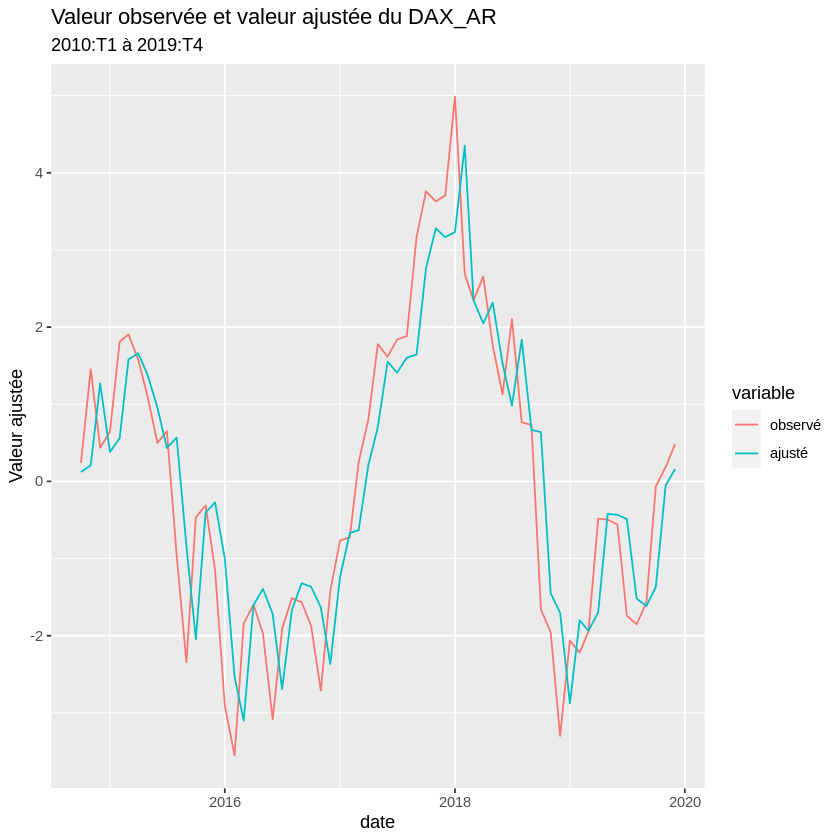

In [92]:
# Création d'un data frame avec les valeurs observées et ajustées pour CPI_AR
df_plot_DAX <- data.frame(date = Z_dataframe$Date,
                          observé = Z_dataframe$Residuals,
                          ajusté = as.vector(fitted(DAX_AR)))

# Renommer les colonnes
colnames(df_plot_DAX) <- c("date", "observé", "ajusté")

# Convertir le data frame en format long pour ggplot
data_melt_DAX <- melt(as.data.frame(df_plot_DAX), id.vars = 1)

# Création du graphique pour CPI_AR
p_DAX_AR <- ggplot(data = data_melt_DAX, aes(x = date)) +
  geom_line(aes(x = date, y = value, color = variable)) +
  labs(y = "Valeur ajustée", title = "Valeur observée et valeur ajustée du DAX_AR",
       subtitle = "2010:T1 à 2019:T4")  # Personnalisez la sous-titre

# Affichage du graphique
print(p_DAX_AR)

**Commentaire**

Le ***graphique*** représente les valeurs observées et ajustées de la série temporelle sur une période de 2010:T1 à 2019:T4. On peut voir que :

Les valeurs ajustées suivent de près les valeurs observées, ce qui indique que le modèle ARIMA(1,0,0) capture bien la dynamique de la série temporelle.
Il y a des périodes où les prédictions s'écartent des valeurs réelles, ce qui pourrait indiquer des chocs ou des événements non capturés par le modèle.
Dans le contexte du projet, ces résultats suggèrent que l'indice DAX présente une forte autocorrélation à un décalage (lag). Le modèle semble fournir une bonne base pour la prévision, mais il est important de noter les périodes où le modèle ne suit pas parfaitement les données, car cela pourrait indiquer des opportunités d'amélioration, par exemple en intégrant des effets saisonniers ou des événements externes.



##Test de significativité des coefficients

**Avec la librairie lmtest**

In [93]:
library(lmtest)
coeftest(DAX_AR)


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 0.872392   0.055912  15.603 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


***Commentaire***:

Pour le coefficient du premier retard (ar1) :
$$\left\lbrace\begin{array}{l} H_{0}\,:\,\phi_{i}=0\\
H_{1}\,:\,\,\phi_{i} \neq 0
\end{array} \right.$$
La statistique de test pour ar1 est également élevée avec une valeur-p inférieure à 2.2e-16, suggérant que le coefficient de premier retard est statistiquement significatif. Cela signifie que le retard a un effet notable sur la série temporelle et que l'hypothèse nulle de non-significativité peut être rejetée pour ce coefficient.


##**Interprétation des coefficients**

Dans la présentation des résultats de l'estimation, la constante rapportée représente l'espérance de la série temporelle. Ainsi, en utilisant l'estimation du modèle et en suivant la structure de l'exemple, la relation estimée pour la série temporelle pourrait être exprimée comme suit :
$$\left\lbrace\begin{array}{l} DAX_{taux}=\hat{d}_{t}\\
\hat{d}_{t}=0.872392*\hat{d}_{t-1}+ϵ_{t}
\end{array} \right.$$

où $\epsilon_{t}$ est le terme d'erreur du modèle, représentant les fluctuations aléatoires qui ne peuvent être expliquées par le modèle.



##Analyse des racines

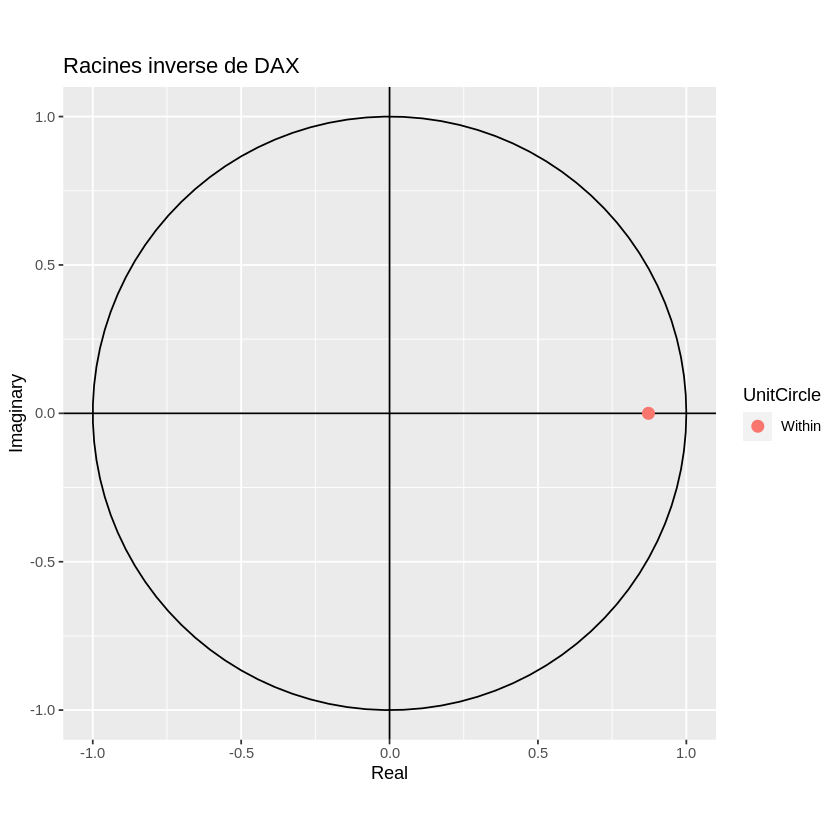

In [94]:
autoplot(DAX_AR,main="Racines inverse de DAX")

Le graphique que nous examinons revêt une importance capitale dans l'évaluation de la stabilité du modèle ARIMA appliqué à l'indice boursier DAX. Ce diagramme, connu sous le nom de diagramme des racines inverses, nous informe de manière cruciale sur la signification des racines du modèle.

Pour qu'un modèle ARIMA soit considéré comme stable et que ses prévisions soient fiables, il est essentiel que ses racines autorégressives (AR) se trouvent à l'intérieur du cercle unité tracé sur le graphique. Cela signifie que les effets des valeurs passées diminuent progressivement et que les racines sont significatives. De même, les racines de la partie moyenne mobile (MA) du modèle doivent rester à l'intérieur du cercle, indiquant qu'elles sont également significatives.

Dans notre cas, l'observation d'un point rouge marqué "Within", positionné confortablement à l'intérieur du cercle sur l'axe horizontal, est une nouvelle positive. Cela confirme que la partie MA de notre modèle est significative. L'absence de points à l'extérieur du cercle renforce l'assurance que la partie AR du modèle est également significative.

En résumé, la présence des racines inverses à l'intérieur du cercle indique que notre modèle ARIMA pour le DAX est construit sur des bases solides, où chaque racine a une signification statistique importante. Cette caractéristique est cruciale, en particulier en finance, où la capacité à anticiper les retours à l'équilibre après des fluctuations revêt une importance capitale.

##Tests sur les résidus


Les tests de vérification des résidus sont :

1. Le test d'absence d'autocorrélation de Ljung-Box,
2. Le test de normalité de Jarque et Bera,
3. Le test d'absence d'effet GARCH de Engle et Granger.

##### Tests d'absence d'autocorrélation des résidus

On teste l'absence d'autocorrélation des résidus jusqu'à l'ordre 10. Les hypothèses du test sont :

$$
\left\lbrace
\begin{array}{l}
H_{0}\,:\,\rho(1)=\rho(2)=\ldots=\rho(10)=0\\
H_{a}\,:\,\exists i\in\left\lbrace 1,\cdots,10 \right\rbrace\,\mathrm{tel\,que}\,\rho(i)\neq 0
\end{array}
\right.
$$


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with zero mean
Q* = 9.3118, df = 9, p-value = 0.409

Model df: 1.   Total lags used: 10



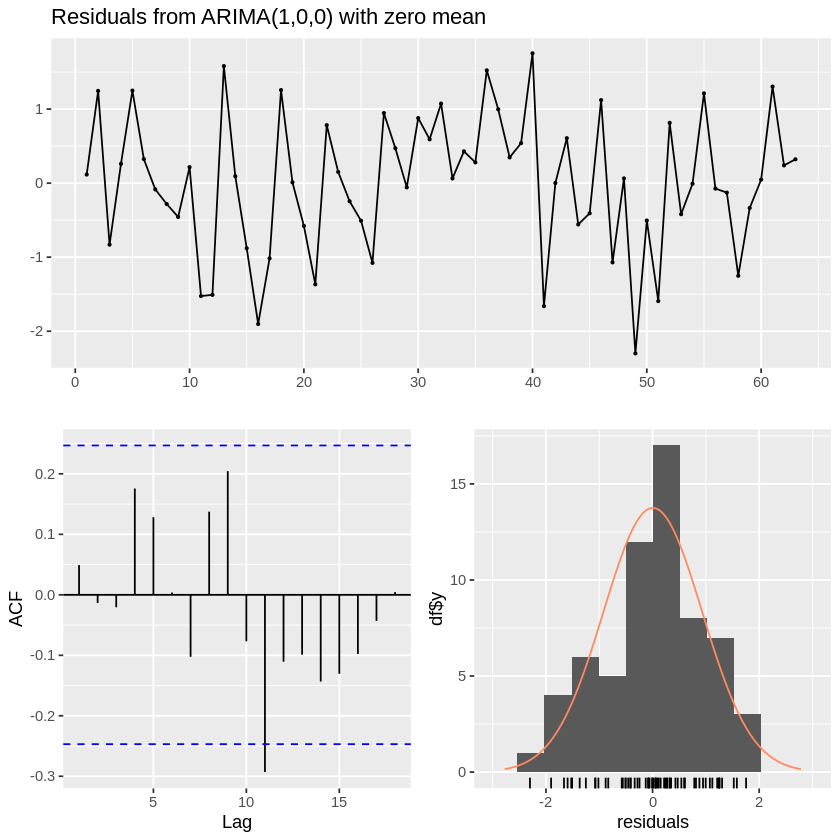

In [95]:
test_res_DAX_AR<-checkresiduals(DAX_AR,lag = 10)

***Commentaire:***

La statistique de test de Ljung-Box est égale à $ Q^* (10) = 9.3119 $.

Sous l'hypothèse nulle $ H_0 $, $ LB_{\text{stat}}$ suit une loi de distribution du $\chi^2$ avec 10 - 1 = 9 degrés de liberté, c'est-à-dire $\chi^2(9)$ .
Les seuils critiques sont donc tirés de la loi $\chi^2(9) $:

* $Q^*(10)_{0.90} = 12.02 $ pour un risque de première espèce de $ 10\% $
* $Q^*(10)_{0.95} = 14.07 $ pour un risque de première espèce de $ 5\% $
* $Q^*(10)_{0.99} = 18.48 $ pour un risque de première espèce de $ 1\% $

Le test de Ljung-Box révèle une valeur $ Q^* $ de  9.3119  avec $ 9 $ degrés de liberté, et une valeur  $p$  de $0.409$ . Ces résultats suggèrent que l'hypothèse nulle d'absence d'autocorrélation des résidus jusqu'au lag $ 10 $ n'est pas rejetée, car la valeur $p $ est supérieure au seuil communément accepté de $0.05 $. Ainsi, il n'existe pas de preuve statistiquement significative d'autocorrélation des résidus du modèle ARIMA(1,0,0), indiquant que le modèle capte bien les données.

Visuellement, l'analyse des résidus ne révèle aucun motif ou structure répétitive évidente, ce qui corrobore l'absence d'autocorrélation. De plus, l'histogramme des résidus superposé à une courbe de densité normale montre que les résidus sont distribués de manière approximativement normale, ce qui est conforme à l'idée que les résidus représentent du bruit blanc.

Ces constatations visuelles, alliées à la valeur $ p $ obtenue du test de Ljung-Box, renforcent la conclusion que le modèle ARIMA(1,0,0) est adapté aux données analysées. L'absence d'autocorrélation significative des résidus jusqu'au dixième lag est essentielle pour l'utilisation future du modèle dans des contextes économétriques.










####Test de l'hypothèse de normalité des résidus

On représente :

1. l'histogramme des résidus (rectangles gris )
2. l'histogramme d'une loi normale avec la même moyenne et le même écart type que celui des résidu (trait rouge)

In [96]:
which(DAX_AR$residuals==max(DAX_AR$residuals))

[1] 40

In [52]:
install.packages("moments")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Skewness des residus : -0.374484"

[1] "kurtosis des residus : 2.614473"

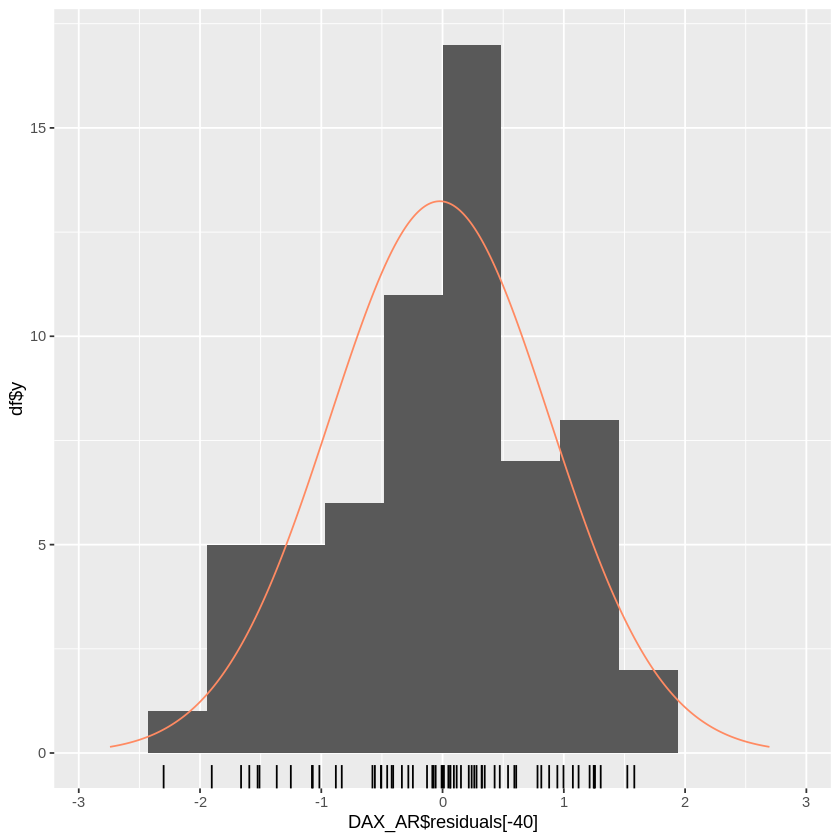

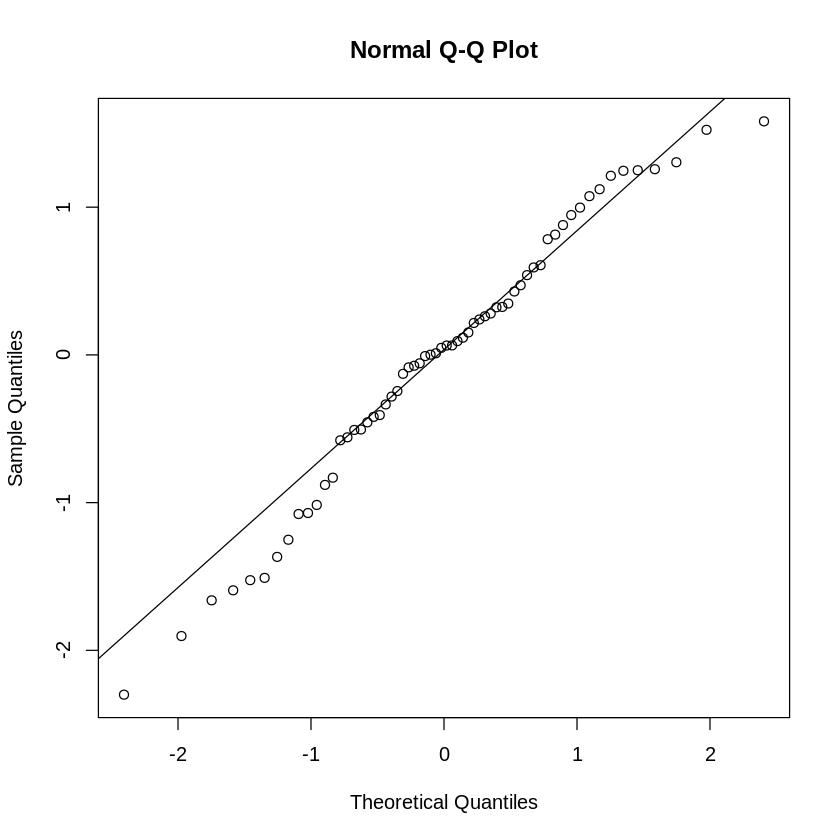

In [97]:
gghistogram(DAX_AR$residuals[-40], add.normal = TRUE)
library(moments)
sprintf("Skewness des residus : %f",skewness(DAX_AR$residuals[-40]))
sprintf("kurtosis des residus : %f",kurtosis(DAX_AR$residuals[-40]))
qqnorm(DAX_AR$residuals[-40])
qqline(DAX_AR$residuals[-40])

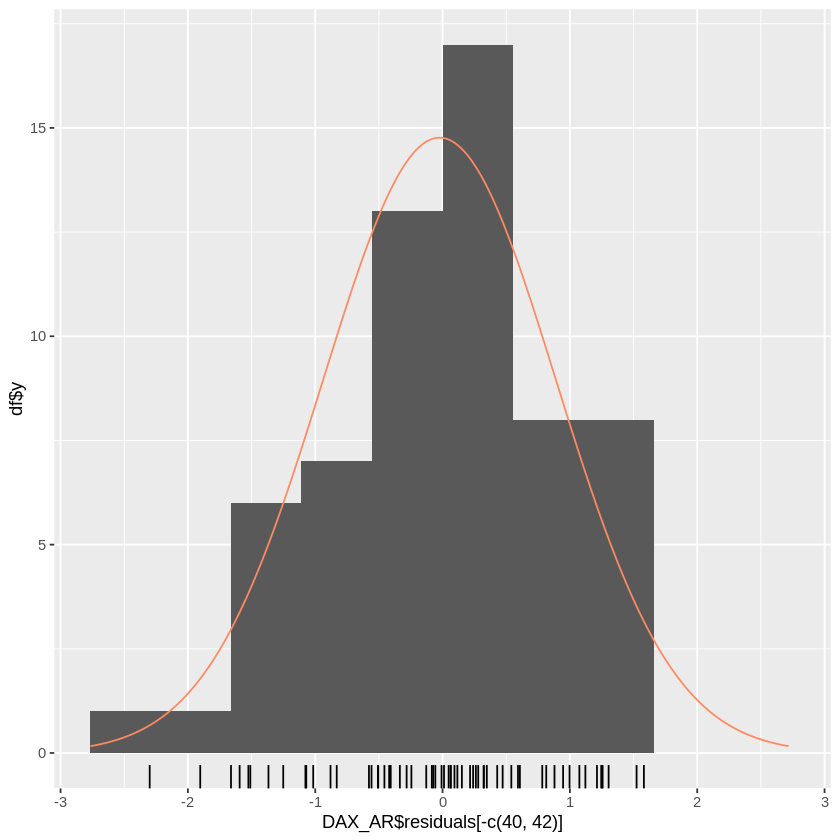

In [98]:
gghistogram(DAX_AR$residuals[-c(40,42)], add.normal = TRUE)

1. Le premier histogramme, superposé avec une courbe de densité normale, suggère une distribution approximative des résidus proche de la normale, malgré quelques écarts manifestes.

2. Le Q-Q plot (quantile-quantile plot) indique que la majorité des points se situent près de la ligne qui représente une distribution normale théorique, ce qui confirme que les résidus suivent globalement une distribution normale, même si quelques points déviants suggèrent des extrêmes.

3. Le dernier histogramme, excluant deux valeurs extrêmes, montre une adéquation légèrement améliorée à la courbe normale théorique, ce qui pourrait indiquer que les résidus, à l'exception de ces extrêmes, sont bien modélisés par une distribution normale.

En résumé, ces visualisations suggèrent que les résidus du modèle ARIMA pour la série temporelle considérée sont largement normalement distribués, avec des exceptions notables qui pourraient nécessiter une enquête plus approfondie.

####Test de l'hypothèse en normalité de Jarque and Bera

In [99]:
library(moments)
sprintf("Skewness des residus : %f",skewness(DAX_AR$residuals[-c(40,42)]))
sprintf("kurtosis des residus : %f",kurtosis(DAX_AR$residuals[-c(40,42)]))

[1] "Skewness des residus : -0.370098"

[1] "kurtosis des residus : 2.571697"

In [56]:
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [100]:
library(tseries)
jarque.bera.test(DAX_AR$residuals)


	Jarque Bera Test

data:  DAX_AR$residuals
X-squared = 1.4862, df = 2, p-value = 0.4756


Les graphiques des résidus et les résultats des tests de normalité indiquent que pour la série temporelle analysée avec le modèle ARIMA(1,0,0), les résidus semblent être bien comportés. Le premier histogramme et le Q-Q plot normal suggèrent que la distribution des résidus est approximativement normale, avec la plupart des points tombant le long de la ligne de référence sur le Q-Q plot, ce qui implique que les résidus ne s'éloignent pas significativement d'une distribution normale.

Le test de Jarque-Bera:
les hypothèses du test sont:
$$
\left\lbrace
\begin{array}{l}
H_{0}\,:\,S(X)= 0\,et\,K(X)=3\\
H_{a}\,:\,S(X)\neq 0\,ou\,K(X)\neq 3
\end{array}
\right.
$$

La statistique de Jarque Bera:
$JB = \frac{T-k}{6} \left[ S^2 + \frac{1}{4}\left( K - 3 \right)^2 \right] \sim \chi^2(2)_{H_0}
$

Les seuils critiques:

* $Q^*(2)_{0.90} = 4.61 $ pour un risque de première espèce de $ 10\% $
* $Q^*(2)_{0.95} = 5.99 $ pour un risque de première espèce de $ 5\% $
* $Q^*(2)_{0.99} = 9.21 $ pour un risque de première espèce de $ 1\% $

Avec une valeur de test X-squared de $\chi^2(9)$ =1.4862, une valeur-p de 0.4756, et 2 degrés de liberté, le test ne rejette pas l'hypothèse nulle de normalité des résidus à un niveau de confiance usuel. En effet, une valeur-p supérieure à 0.05 indique qu'il n'y a pas de preuve statistique pour rejeter l'hypothèse que les résidus suivent une distribution normale.

En conclusion, les résidus de la série temporelle analysée présentent des caractéristiques de distribution normale et ne montrent pas de signes d'autocorrélation significative, ce qui suggère que le modèle ARIMA(1,0,0) est adéquat pour capturer l'information contenue dans les données sans laisser de structures systématiques inexpliquées dans les résidus.








####Test de Engle Granger d'absence d'effet ARCH

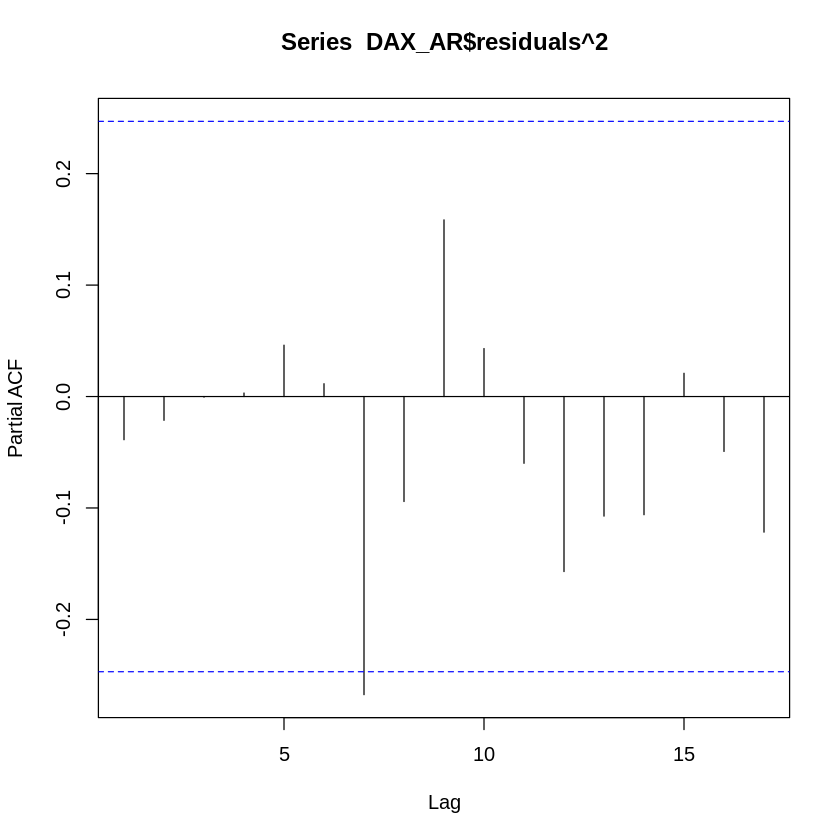

In [101]:
pacf(DAX_AR$residuals^2)

On utilise la fonction ArchTest de la library FinTS (il existe d'autres fonctions dans les packages ATSA et NortsTest notamment)

On teste l'hypothèse d'absence d'effet ARCH avec quatre retards. La régression estimée est :

$$
\hat{\epsilon}_{t}^{2}= \gamma_{0} + \gamma_{1} \hat{\epsilon}_{t-1}^{2} +\gamma_{2} \hat{\epsilon}_{t-2}^{2} +\gamma_{3} \hat{\epsilon}_{t-3}^{2} +\gamma_{4} \hat{\epsilon}_{t-4}^{2} + v_{t}
$$


Les hypothèses du test sont :

$$
\left\{
\begin{array}{ll}
H_{0} : \gamma_{1}=...=\gamma_{4}=0 \Rightarrow \,pas\,d'effet\,ARCH\\
H_{a} : \gamma_{1}\neq 0\, ou \,... \gamma_{4} \neq 0 \Rightarrow effet\,ARCH
\end{array}
\right.
$$

In [59]:
install.packages("FinTS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [102]:
library(FinTS)
ArchTest(DAX_AR$residuals,lags=4,demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  DAX_AR$residuals
Chi-squared = 0.080294, df = 4, p-value = 0.9992


**Commentaire:**

Le test ARCH (Autoregressive Conditional Heteroskedasticity) LM est une procédure statistique utilisée pour détecter la présence d'hétéroscédasticité conditionnelle dans les résidus d'une série temporelle. L'hétéroscédasticité conditionnelle, ou effets ARCH, se produit lorsque la variance d'une série temporelle à un point donné dépend de la variance à des points précédents dans le temps. La présence d'effets ARCH dans les résidus d'un modèle peut indiquer des instabilités dans la volatilité qui, si elles ne sont pas prises en compte, peuvent conduire à une mauvaise spécification du modèle et à des prédictions inexactes.

L'hypothèse nulle (H0) du test ARCH LM est qu'il n'y a pas d'effets ARCH, ce qui signifie que la volatilité des erreurs est constante dans le temps. L'hypothèse alternative (Ha) est que la variance des erreurs change avec le temps, indiquant la présence d'effets ARCH.

L'examen des résultats du test LM pour les effets ARCH sur les résidus de notre série DAX_AR révèle des indices intéressants sur la stabilité de la volatilité dans nos données. Avec une valeur de chi-carré aussi minime, à savoir 0.080293<$VC_{5\%}=9.488$, et une valeur-p atteignant un sommet presque parfait de 0.9992, la situation est assez limpide : les résidus ne montrent pas de signes d'effets ARCH. En d'autres termes, la volatilité passée ne semble pas influencer la volatilité future.

Dans le langage des statistiques, une valeur-p aussi élevée nous indique que la probabilité de rejeter à tort l'hypothèse nulle – celle qui postule qu'il n'y a pas d'effets ARCH dans la série – est pratiquement nulle. C'est comme si nous avions cherché des empreintes dans le sable qui signaleraient les pas d'une créature insaisissable, mais que nous n'avions trouvé qu'une surface lisse et intacte.

###Prévison:
####Calcul des prévision du modèle filtré et représentation graphique

   Point Forecast     Lo 95    Hi 95
64      0.4208900 -1.395067 2.236847
65      0.3671811 -2.042689 2.777052
66      0.3203259 -2.457728 3.098380
67      0.2794498 -2.748967 3.307867

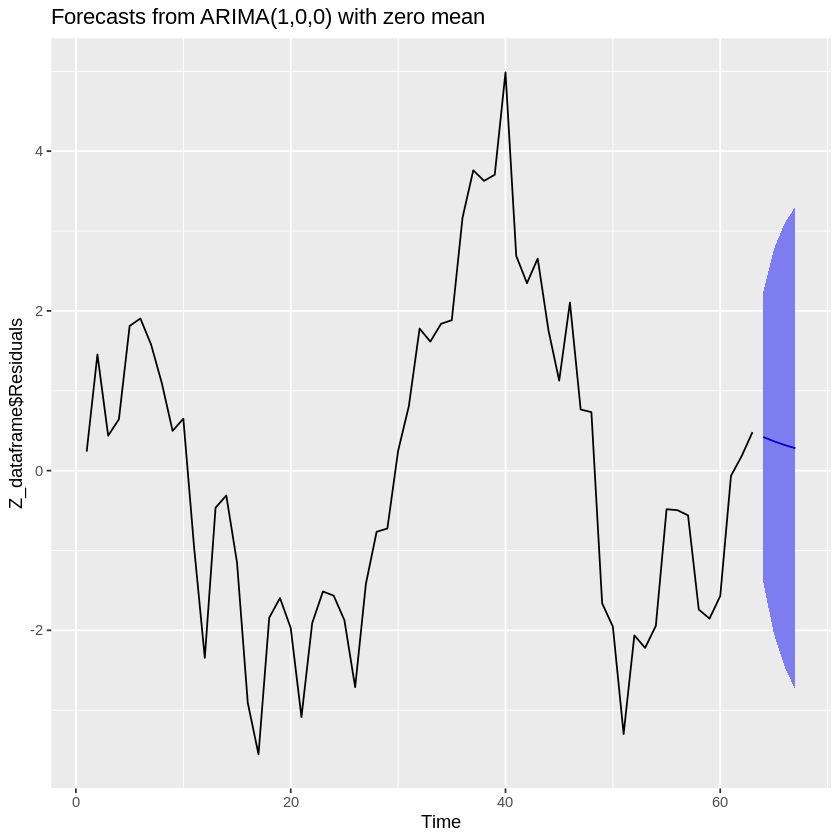

In [103]:

library(forecast)
forecast_AR1<-forecast(DAX_AR,h=4,level=95)
forecast_AR1
autoplot(forecast_AR1)

In [104]:
tail(Z_dataframe)

,Date,Residuals,Forecast
,<date>,<dbl>,<dbl>
58,2019-07-01,-1.7397944,NA
59,2019-08-01,-1.8531356,NA
60,2019-09-01,-1.5688271,NA
61,2019-10-01,-0.0644659,NA
62,2019-11-01,0.1836907,NA
63,2019-12-01,0.4824550,NA


####Calcul des prévision du modèle  filtré:

Notre modèle s'écrit:

$\hat{d}_{t}=0.872392*\hat{d}_{t-1}+ϵ_{t}$

Ainsi la prévision s'écrit de la manière suivante:

$\hat{X}_{T}(h)=E(X_{t+h}|I_{t})$

<mark>$\hat{X}_{T}(h)=E(X_{t+h}|I_{t})$</mark>


Pévision de t=1:

$$\hat{X}_{T}(1)=E(X_{t+1}|I_{t})$$

$$0.872392*\hat{d}_{t}$$

$$=0.872392*0.48245535=0.4208903$$


Pévision de t=2:

$$\hat{X}_{T}(2)=E(X_{t+2}|I_{t})$$

$$=0.872392*\hat{d}_{t+1}$$

$$=0.872392*0.4208903=0.3671799 $$


Pévision de t=3:

$$\hat{X}_{T}(3)=E(X_{t+3}|I_{t})$$

$$=0.872392*\hat{d}_{t+2}$$

$$=0.872392*0.3671814=0.3203262$$


Pévision de t=4:

$$\hat{X}_{T}(4)=E(X_{t+4}|I_{t})$$

$$=0.872392*\hat{d}_{t+3}$$

$$=0.872392*0.3203262=0.2794501$$


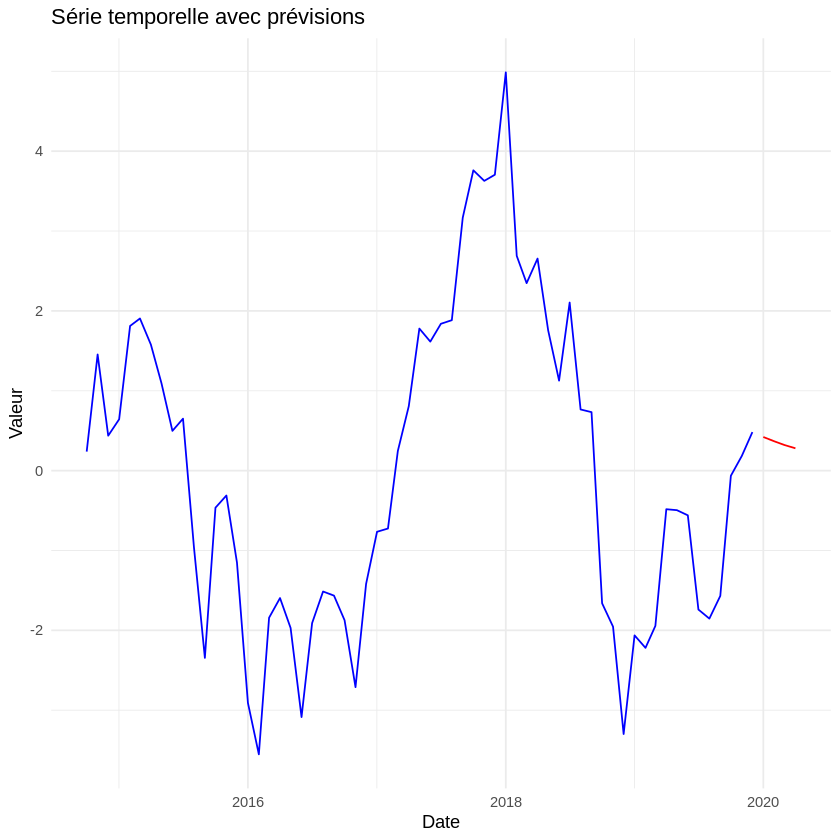

In [105]:
library(forecast)
library(ggplot2)
library(dplyr)
library(lubridate)
library(tibble)


# S'assurer que la colonne Date est de type Date ou POSIXct
Z_dataframe$Date <- as.Date(Z_dataframe$Date)

# Créer un data frame pour les prévisions avec les dates correspondantes
# La séquence commence après la dernière date de la série historique
dates_forecast <- seq(from = max(Z_dataframe$Date) + months(1), by = "1 month", length.out = 4)

forecast_df <- tibble(
  Date = dates_forecast,
  Forecast = forecast_AR1$mean
)

# Combinez les prévisions avec la série temporelle originale
# Ajoutez une colonne de prévision avec des NA pour les données historiques
Z_dataframe <- Z_dataframe %>%
  mutate(Forecast = NA_real_)

combined_df <- bind_rows(Z_dataframe, forecast_df)

# Créer le graphique avec ggplot2
# Assurez-vous que la colonne Residuals existe dans Z_dataframe
ggplot(combined_df, aes(x = Date)) +
  geom_line(aes(y = Residuals), color = 'blue', na.rm = TRUE) +  # na.rm = TRUE pour enlever les NA
  geom_line(aes(y = Forecast), color = 'red', na.rm = TRUE) +
  labs(title = "Série temporelle avec prévisions", y = "Valeur") +
  theme_minimal()



***Conclusion***

Les prévisions générées par le modèle ARIMA(1,0,0) semblent avoir une certaine validité en termes de capture de la tendance centrale à long terme de l'indice DAX. Cependant, le modèle ne semble pas saisir la volatilité et les mouvements à court terme de l'indice. Cela pourrait être dû à l'absence de composantes saisonnières ou cycliques dans le modèle, ou à la non-prise en compte d'événements récents qui pourraient avoir un impact sur le marché boursier. Pour améliorer les prévisions, il serait utile d'examiner des modèles plus complexes ou d'inclure des données exogènes qui pourraient influencer l'indice DAX.

####Calcul des prévision du modèle non filtré:

> Bloc en retrait



On revient à notre modèle non stationnaire:

$DAX_{t}=a+bt+\hat{d}_{t}\,avec\,\hat{d}_{t}\,est\,notre\,série\,Stationnaire$

Ainsi:

$DAX_{t}=7.98111+0.03969t+\hat{d}_{t}$



Ainsi la prévision s'écrit de la manière suivante:

$\hat{DAX}_{T}(h)=E(DAX_{t+h}|I_{t})$

<mark>$\hat{DAX}_{T}(h)=E(DAX_{t+h}|I_{t})$</mark>


Pévision de t=1:

$$\hat{DAX}_{T}(1)=E(DAX_{t+1}|I_{t})$$

$$=7.98111+0.03969(63+1)+\hat{X}_{T}(1)$$

$$=10.9421$$

Pévision de t=2:

$$\hat{DAX}_{T}(2)=E(DAX_{t+2}|I_{t})$$

$$=7.98111+0.03969(63+2)+\hat{X}_{T}(2)=10.9281399$$


Pévision de t=3:

$$\hat{DAX}_{T}(3)=E(DAX_{t+3}|I_{t})$$

$$=7.98111+0.03969(63+3)+\hat{X}_{T}(3)=10.9209762$$

Pévision de t=4:

$$\hat{DAX}_{T}(4)=E(DAX_{t+4}|I_{t})$$

$$=7.98111+0.03969(63+4)+\hat{X}_{T}(4)=10.9197901$$

# ***$IV.$MULTIVARIE*** :

Alors que nous nous aventurons plus profondément dans les intrications de la finance et de l'économie, notre projet prend une tournure résolument multivariée. Nous vous invitons à explorer avec nous les interactions complexes et souvent subtiles entre deux piliers économiques : les résidus de l'indice DAX et les variations de l'indice des prix à la consommation (CPI) au sein de la zone euro. Avant de poursuivre, clarifions un point essentiel : lorsque nous parlons de "résidus" en relation avec la série DAX, nous nous référons aux variations de cette série après avoir été stationnarisée, un processus visant à rendre la moyenne et la variance constantes dans le temps. Ce voyage analytique nous est facilité par l'élégante structure d'un modèle vectoriel autorégressif (VAR).

Imaginez ces deux séries temporelles comme des danseurs dans un tango économique, où chaque pas, chaque mouvement est à la fois une réaction et une anticipation de l'autre. À travers le prisme du modèle VAR, nous allons décrypter ce pas de deux, en examinant non seulement comment chaque série influence son propre avenir à travers ses retards, mais aussi comment elle prédit et est influencée par sa partenaire.

La sélection méticuleuse de l'ordre du modèle VAR, guidée par des critères statistiques éprouvés, ouvrira la voie à une analyse causale de Granger. Cette approche nous permettra de dévoiler les canaux cachés de l'influence économique, répondant à des questions clés telles que : "Le marché boursier est-il le prédicteur de l'inflation ou son disciple ?"

Ensuite, armés de fonctions de réponse impulsionnelle, nous observerons les répercussions d'un choc inattendu dans une série sur l'autre, dessinant ainsi une cartographie des effets dominos économiques. Et comme dans toute histoire complexe, nous chercherons à comprendre les parts de mystère à l'aide de la décomposition de la variance de l'erreur de prévision, qui nous révèle quelle proportion de l'incertitude future de chaque série peut être attribuée à des chocs passés de l'autre.

Rejoignez-nous dans cette enquête économétrique qui, nous l'espérons, enrichira non seulement notre compréhension mais aussi notre appréciation de la dynamique sophistiquée qui gouverne les marchés financiers et l'économie mondiale.

In [80]:
install.packages("vars")
install.packages("lpirfs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘strucchange’, ‘sandwich’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘bdsmatrix’, ‘collapse’, ‘maxLik’, ‘Rdpack’, ‘Formula’, ‘doParallel’, ‘gridExtra’, ‘plm’




In [81]:
install.packages("dplyr")
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [82]:
library(dplyr)

# Convertissez les formats de date si nécessaire
Z_dataframe <- Z_dataframe %>%
  mutate(Date = as.Date(as.yearmon(Date)))

df_diff_before <- df_diff_before %>%
  mutate(Date = as.Date(Date))

# Filtrez les dataframes pour les dates entre Jan 2015 et Dec 2019
Z_dataframe_filtered <- Z_dataframe %>%
  filter(Date >= as.Date('2015-01-01') & Date <= as.Date('2019-12-31'))

df_diff_before_filtered <- df_diff_before %>%
  filter(Date >= as.Date('2015-01-01') & Date <= as.Date('2019-12-31'))

# Effectuez la jointure des deux dataframes sur la colonne 'Date'
joined_df <- Z_dataframe_filtered %>%
  inner_join(df_diff_before_filtered, by = "Date")

# Supprimez les colonnes Forecast.x et Forecast.y
final_df <- dplyr::select(joined_df, -Forecast.x, -Forecast.y)

# Affichez le résultat
head(final_df)


,Date,Residuals,CPI_diff
,<date>,<dbl>,<dbl>
1,2015-01-01,0.6432197,-0.5462356
2,2015-02-01,1.8113954,0.0601197
3,2015-03-01,1.9049958,0.0435878
4,2015-04-01,1.5775451,-0.1365689
5,2015-05-01,1.0940333,0.1354572
6,2015-06-01,0.4978200,0.0127112


In [83]:
library(vars)
pselect<-VARselect(y=final_df[,c(2,3)],lag.max=8,type=c("const"))
pselect$criteria # Affichage des valeurs des critère de sélection
pselect$selection # nombre de retards optimal selon les critères de sélection

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: strucchange

Loading required package: sandwich



,1,2,3,4,5,6,7,8
AIC(n),-3.30137929,-3.24823980,-3.10364530,-2.99103783,-2.99111263,-2.87608232,-2.78593793,-2.78369801
HQ(n),-3.21506459,-3.10438196,-2.90224432,-2.73209371,-2.67462538,-2.50205192,-2.35436440,-2.29458134
SC(n),-3.07623579,-2.87300062,-2.57831045,-2.31560731,-2.16558645,-1.90046046,-1.66022040,-1.50788481
FPE(n),0.03684178,0.03888884,0.04503313,0.05059017,0.05088734,0.05758858,0.06378516,0.06496716


AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

Le nombre de retard optimal varie selon le critère :

1. le critère AIc préconise 1 retard,
2. le critère HQ préconise 1 retards,
3. le critère SC préconise 1 retard,
4.le nombre de retards optimaux sont néanmoins inférieurs à lag.max


On estime le modèle VAR avec 1 retard.

##**Estimation d'un modèle VAR(1)**

In [84]:
var.1lag <-VAR(y =final_df[,c(2,3)] ,type="const",lag.max = 1)
summary(var.1lag) #Affichage des résultats avec summary



VAR Estimation Results:
Endogenous variables: Residuals, CPI_diff 
Deterministic variables: const 
Sample size: 59 
Log Likelihood: -60.062 
Roots of the characteristic polynomial:
0.8859 0.2729
Call:
VAR(y = final_df[, c(2, 3)], type = "const", lag.max = 1)


Estimation results for equation Residuals: 
Residuals = Residuals.l1 + CPI_diff.l1 + const 

              Estimate Std. Error t value Pr(>|t|)    
Residuals.l1  0.889238   0.061207  14.528   <2e-16 ***
CPI_diff.l1  -0.302985   0.635843  -0.477    0.636    
const        -0.003706   0.124096  -0.030    0.976    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.9508 on 56 degrees of freedom
Multiple R-Squared: 0.7903,	Adjusted R-squared: 0.7828 
F-statistic: 105.5 on 2 and 56 DF,  p-value: < 2.2e-16 


Estimation results for equation CPI_diff: 
CPI_diff = Residuals.l1 + CPI_diff.l1 + const 

             Estimate Std. Error t value Pr(>|t|)  
Residuals.l1 0.006708   0.011559   0.580  

**Commentaire**


Les résultats du modèle VAR pour les séries stationnarisées avant COVID-19 révèlent des différences notables dans l'impact des retards propres à chaque série. Dans la série stationnarisée du DAX ('Residuals'), le coefficient du retard propre est significatif et indique une forte persistance, comme le montre sa valeur élevée (0.889238) et une p-value inférieure à 0.05. Cela suggère que les valeurs précédentes de l'indice DAX ont une influence marquée sur les valeurs actuelles, reflétant une forte inertie ou tendance à maintenir une trajectoire similaire d'une période à l'autre.

En revanche, pour la série stationnarisée de l'inflation ('CPI_diff'), bien que le retard propre soit statistiquement significatif avec une p-value de 0.0287, la valeur du coefficient est relativement modeste (0.269593). Cela démontre que bien que les valeurs passées de l'inflation aient un effet statistiquement significatif sur les valeurs actuelles, l'impact est moins prononcé que pour l'indice DAX. Le R² ajusté plus faible pour 'CPI_diff' renforce cette interprétation, indiquant que les variations de l'inflation sont moins autocorrélées et potentiellement plus affectées par d'autres facteurs exogènes.

La non-significativité des coefficients croisés entre 'Residuals' et 'CPI_diff' dans leurs équations respectives montre qu'il n'y a pas de preuve d'une influence directe et significative de l'une des séries sur l'autre dans le court terme. Le coefficient de 'CPI_diff.l1' dans l'équation de 'Residuals' et de 'Residuals.l1' dans l'équation de 'CPI_diff' ont des p-values de 0.636 et 0.5640 respectivement, indiquant que ces coefficients ne sont pas significatifs au seuil de 5%. Cela signifie que dans le cadre de notre analyse pré-COVID, les variations du DAX ne semblent pas être un prédicteur significatif des changements dans l'inflation, et vice versa.

En somme, cette analyse renforce l'idée que les séries stationnarisées du DAX et de l'inflation évoluent selon leurs propres dynamiques internes sans montrer de preuves d'interaction mutuelle significative dans la période précédant la pandémie de COVID-19.


##Test de causalité au sens de Granger

Causalité de l'inflation sur le DAX :

In [85]:
causality(var.1lag,cause=c('CPI_diff'))


$Granger

	Granger causality H0: CPI_diff do not Granger-cause Residuals

data:  VAR object var.1lag
F-Test = 0.22706, df1 = 1, df2 = 112, p-value = 0.6346


$Instant

	H0: No instantaneous causality between: CPI_diff and Residuals

data:  VAR object var.1lag
Chi-squared = 0.0042425, df = 1, p-value = 0.9481



$$
\text{Hypothèses du test d'absence de causalité:}
\left\{
\begin{array}{l}
H_0 : a^1_{12} = 0 \Rightarrow \text{CPI_diff} \text{ ne cause pas } Residuals \\
H_1 : a^1_{12} \neq 0 \Rightarrow \text{CPI_diff}  \text{ cause } Residuals
\end{array}
\right.
$$


Dans l'analyse des interactions entre les séries temporelles, l'une des questions clés que nous cherchons à répondre est de savoir si les changements dans une série peuvent être utilisés pour prédire les changements dans une autre. C'est exactement ce que le test de Granger cherche à établir. D'après les résultats obtenus, avec une valeur-p de 0.6346 pour le test de Granger, nous constatons qu'elle dépasse largement le seuil habituel de 0.05. Cela signifie qu'il n'existe pas de preuves statistiquement significatives nous permettant de rejeter l'idée que les variations de CPI_diff (différences de l'Indice des Prix à la Consommation) n'affectent pas les Residuals (les résidus de la série du DAX stationnarisée avant COVID).
les seuils critiques de la loi de FISHER:


| $\alpha$                  | 5\%  | 10\% |
|---------------------------|------|------|
| $f_{1-\alpha}(1,+\infty)$ | 2.99 | 4.60 |


Pour contextualiser ces chiffres, les seuils critiques issus de la loi F sont de 2.99 pour un niveau de confiance de 95% et de 4.60 pour un niveau de confiance de 90%. La statistique F observée est de 0.22706, ce qui se trouve bien en dessous de ces valeurs seuils. Cela renforce l'idée qu'il n'y a pas de lien prédictif direct de CPI_diff sur les Residuals dans le contexte de notre modèle.

Il est essentiel de garder à l'esprit que le test de Granger ne détermine pas une causalité directe au sens où nous pourrions le comprendre dans un contexte quotidien. Il ne dit pas que les variations de CPI_diff sont une cause des changements dans Residuals. Au lieu de cela, le test évalue si les valeurs passées d'une série offrent des informations qui peuvent prédire les valeurs futures de l'autre. Ainsi, bien que les deux séries puissent être liées d'une manière ou d'une autre, notre modèle VAR ne trouve aucune preuve que le passé de l'inflation, tel que mesuré par CPI_diff, ait un effet prédictif sur les mouvements passés du DAX, reflétés dans les Residuals, pour la période analysée avant COVID.

Causalité du DAX sur l'inflation:

$$
\text{Hypothèses du test d'absence de causalité:}
\left\{
\begin{array}{l}
H_0 : a^1_{21} = 0 \Rightarrow Residuals\text{ ne cause pas }\text{CPI_diff}   \\
H_1 : a^1_{21} \neq 0 \Rightarrow Residuals \text{ cause } \text{CPI_diff}
\end{array}
\right.
$$

In [86]:
causality(var.1lag,cause=c('Residuals'))


$Granger

	Granger causality H0: Residuals do not Granger-cause CPI_diff

data:  VAR object var.1lag
F-Test = 0.3368, df1 = 1, df2 = 112, p-value = 0.5628


$Instant

	H0: No instantaneous causality between: Residuals and CPI_diff

data:  VAR object var.1lag
Chi-squared = 0.0042425, df = 1, p-value = 0.9481



L'analyse du test de causalité de Granger, montre que l'hypothèse nulle est que les résidus de la série temporelle des données DAX stationnarisées avant COVID-19 (Residuals) ne causent pas Granger la série CPI stationnarisée avant COVID-19 (CPI_diff). Le résultat du F-test est 0.3368 avec une valeur p de 0.5628, ce qui est bien au-dessus du seuil classique de 0.05 utilisé pour déterminer la significativité statistique.

Avec une valeur p aussi élevée, nous ne pouvons pas rejeter l'hypothèse nulle; par conséquent, nous concluons qu'il n'y a pas suffisamment de preuves pour affirmer que les résidus de la série DAX fournissent des informations significatives sur les futures valeurs de la série CPI dans le cadre de ce modèle VAR. En d'autres termes, la variation passée des résidus DAX stationnarisés ne semble pas influencer de manière prédictive la variation de la série CPI stationnarisée.

Il est crucial de reconnaître que l'absence de causalité de Granger ne signifie pas nécessairement qu'il n'y a aucune relation entre les deux séries; cela signifie simplement que, selon ce modèle VAR particulier, les variations passées des résidus DAX ne sont pas utiles pour prédire les changements futurs de CPI_diff.²

##Fonctions impulsion-réponse

Les fonctions de réponse à l'impulsion représentées dans les graphiques permettent d'analyser l'impact d'un choc standardisé dans une série temporelle sur elle-même et sur l'autre série au fil du temps. Voici l'analyse pour chaque graphique en considérant les deux variables, Residuals et CPI_diff, qui représentent respectivement les séries stationnarisées avant COVID pour l'indice DAX et pour l'indice des prix à la consommation (CPI).


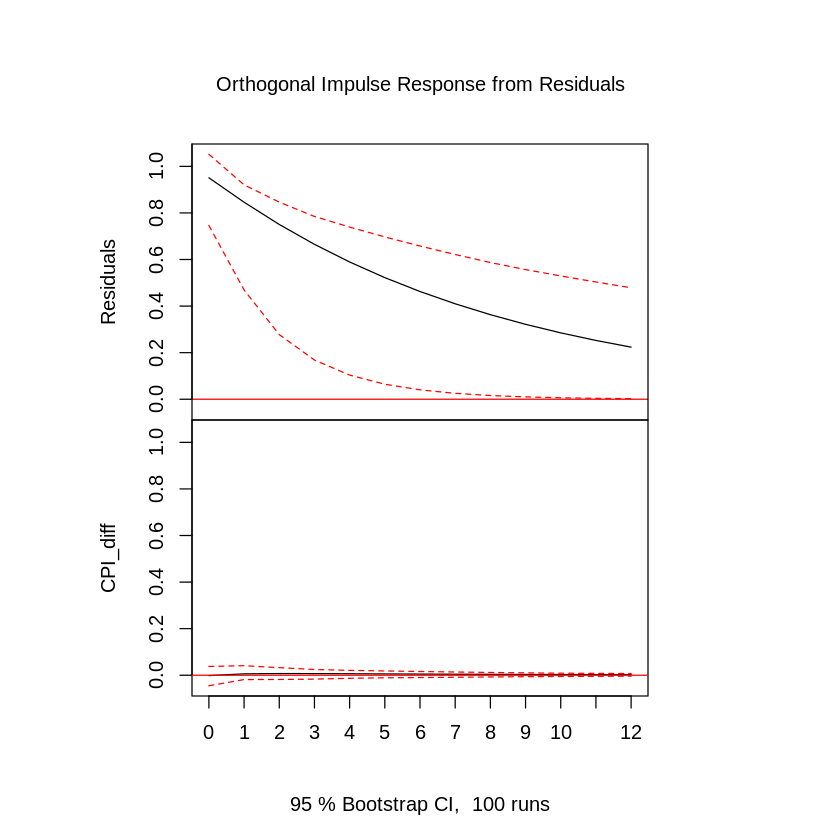

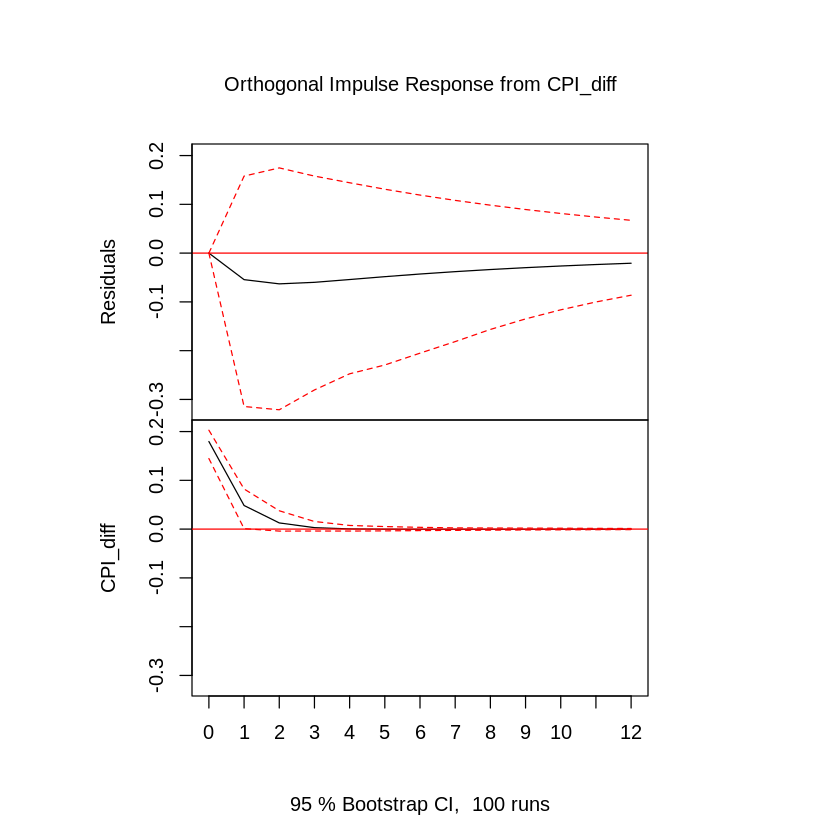

In [87]:
irf<-irf(var.1lag,n.ahead = 12,ortho = TRUE,ci=0.95)
plot(irf)

**Analyse du premier graphique (Orthogonal Impulse Response from Residuals):**

1. Réaction des Residuals à un choc dans les Residuals: Le graphique montre que les Residuals réagissent à un choc en eux-mêmes avec une réponse initiale positive qui diminue progressivement vers zéro. Cela indique que l'impact d'un choc sur les Residuals de l'indice DAX stationnarisé est temporaire et que la série a tendance à revenir à son niveau normal, reflétant une certaine forme d'autocorrélation.

2. Réaction de CPI_diff à un choc dans les Residuals: On observe qu'un choc dans les Residuals a un effet quasi-nul sur CPI_diff. Les intervalles de confiance englobent la ligne zéro, ce qui signifie que l'impact d'un choc dans l'indice DAX stationnarisé sur l'inflation est statistiquement non significatif.

**Analyse du deuxième graphique (Orthogonal Impulse Response from CPI_diff):**

1. Réaction des Residuals à un choc dans CPI_diff: La réaction des Residuals à un choc dans CPI_diff est également négligeable. Les intervalles de confiance incluent la ligne de base zéro, ce qui indique qu'il n'y a pas d'effet notable de l'inflation sur les Residuals de l'indice DAX stationnarisé.

2. Réaction de CPI_diff à un choc dans CPI_diff: Un choc dans CPI_diff montre une réponse positive initiale dans la même série, qui diminue ensuite vers zéro. Cela suggère que l'inflation a une dynamique propre autocorrélée et que les chocs dans l'inflation ne persistent pas au fil du temps.

**Conclusion Générale:**

Les résultats des fonctions de réponse à l'impulsion sont cohérents avec les tests de causalité de Granger précédemment discutés. Les tests de Granger n'ont pas révélé de preuve de causalité entre les Residuals et CPI_diff. Les fonctions de réponse à l'impulsion renforcent cette conclusion en montrant que les chocs dans chaque série n'ont pas d'effets significatifs et persistants sur l'autre série. En résumé, ces analyses soulignent l'indépendance des deux séries avant la période COVID-19, suggérant que les mouvements dans l'indice DAX stationnarisé ne sont pas influencés par l'inflation et vice versa.

##Estimation des IRF par les projections locales

On estime les IRF par la méthode des projections locales. On spécifie les paramètres suivants :

* le nombre d'horizon est égal à 12
* Pour chaque horizon $h=1,...,12$, le nombre de retards dans la régression de la projection locale sera au plus égal à 8 (max_lags = 8) et choisi par la minimisation du critère BIC
* on applique des chocs égaux à 1 écart type du choc structurel : shock_type = 0. (shock_type =1 pour des chocs )
* Intervalle de confiance à 95\% (confit=1.96) (confit = 1.65 pour un intervalle de confiance à 90% et confit=1 pour un intervalle de confiance à 68\%)

[[1]]
NULL


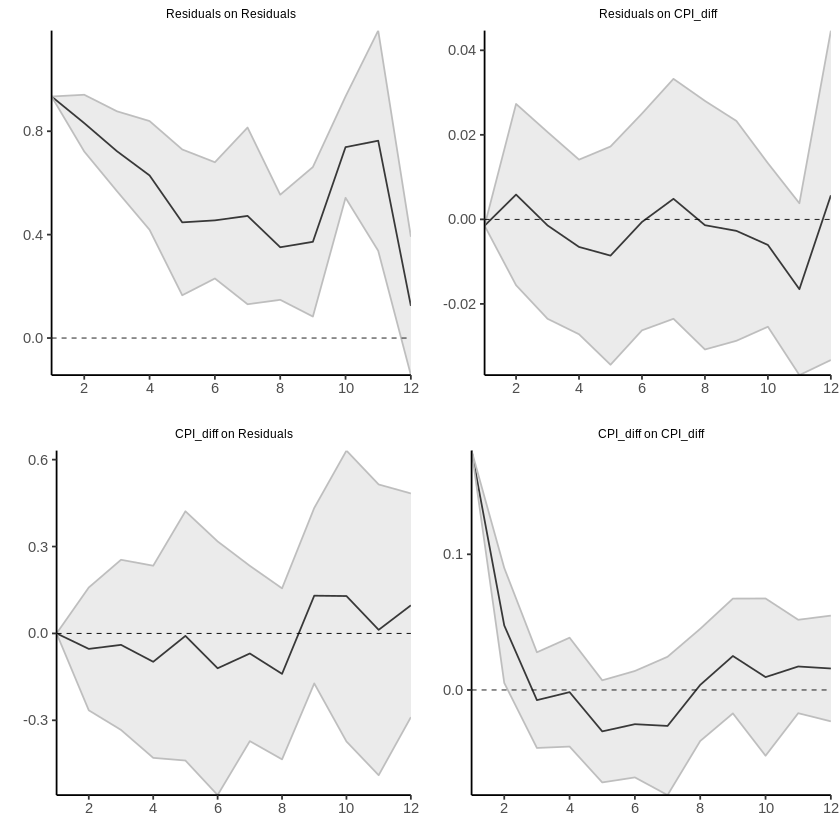

In [88]:
library(lpirfs)
irf_LP <-lp_lin(endog_data = final_df[, c(2, 3)],
                    lags_endog_lin = NaN,
                    lags_criterion = 'BIC',
                    max_lags = 8,
                    trend = 0,
                    shock_type = 0,
                    confint=1.96,
                    hor=12,
                    adjust_se=TRUE)

plot(irf_LP)


Les graphiques présentés sont des estimations de la fonction de réponse impulsionnelle (IRF) utilisant les projections locales pour deux séries temporelles : les résidus de l'indice DAX stationnarisé (Residuals) et la série stationnarisée de l'indice des prix à la consommation (CPI_diff), toutes deux avant la période de COVID-19. Voici une analyse détaillée pour chaque graphique :

**Réponse des Residuals sur Residuals:**

Ce graphique montre la réaction des Residuals à un choc en eux-mêmes. Il y a une réponse initiale positive suivie de variations oscillantes autour de zéro. La réponse devient moins prononcée et se stabilise autour de zéro au fil du temps, indiquant que l'effet d'un choc sur la série est temporaire et que la série a tendance à revenir à sa moyenne à long terme.

**Réponse des Residuals sur CPI_diff:**

La réaction des Residuals à un choc dans CPI_diff est proche de zéro tout au long de l'horizon temporel, indiquant que les chocs dans les niveaux d'inflation n'ont pas d'impact significatif sur les résidus de l'indice DAX stationnarisé. Cela suggère une faible relation dynamique entre l'inflation et l'indice DAX dans ce contexte spécifique.

**Réponse de CPI_diff sur Residuals:**

Ce graphique indique que les chocs dans les Residuals ont une influence initiale sur CPI_diff, avec des réponses variantes mais restant majoritairement au-dessus de zéro. La réponse diminue avec le temps et semble se stabiliser. Cela pourrait indiquer que les fluctuations dans l'indice DAX ont un effet transitoire sur l'inflation, mais l'incertitude autour de cette réponse, illustrée par les larges intervalles de confiance, suggère que cette relation n'est pas fortement établie.

**Réponse de CPI_diff sur CPI_diff:**

La réponse de CPI_diff à un choc en lui-même montre une réaction initialement positive qui décroît rapidement pour fluctuer autour de zéro. Cela démontre que l'inflation a une capacité de retour à sa moyenne après un choc, suggérant une autocorrélation mais avec une persistance limitée des effets du choc au fil du temps.

**Conclusion générale:**

Les estimations des IRF par les projections locales indiquent que les deux séries, bien que stationnarisées, conservent une certaine autocorrélation intrinsèque. Cependant, l'influence croisée entre les résidus de l'indice DAX et l'inflation semble être limitée, ce qui corrobore les résultats des tests de causalité de Granger qui n'ont pas trouvé de preuves d'interdépendance significative entre ces deux séries temporelles avant la pandémie de COVID-19.

##Calcul des prévisions

On calcule les prévisions pour les 10 observations suivantes à partir du VAR(1)

         Length Class  Mode   
fcst       2    -none- list   
endog    120    -none- numeric
model     10    varest list   
exo.fcst   0    -none- NULL   

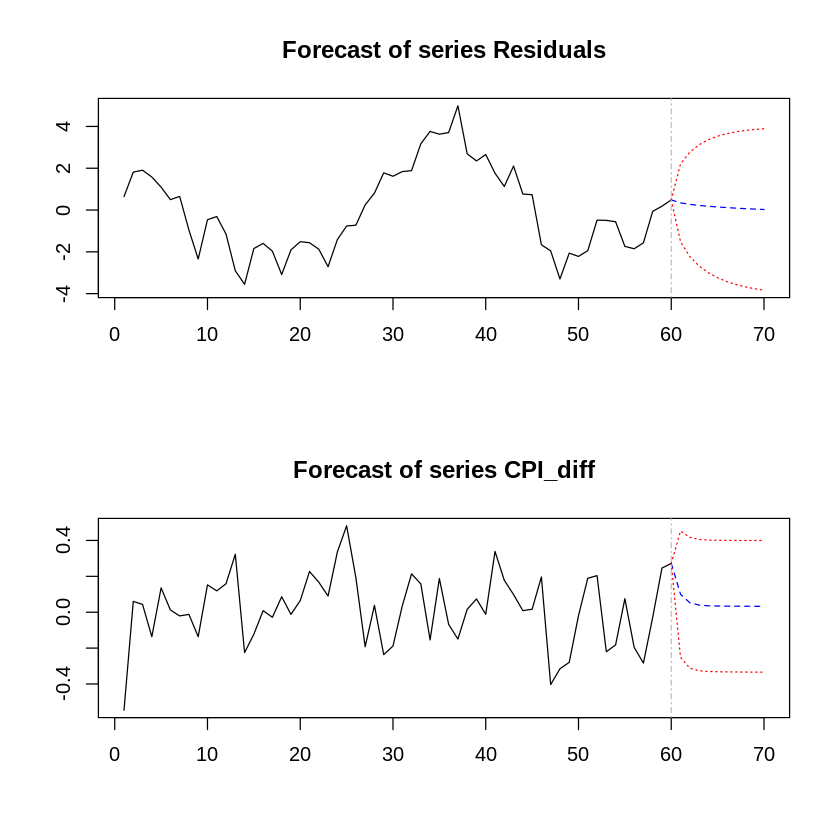

In [89]:
forecast_var<-predict(var.1lag,n.ahead = 10, ci=0.95)

summary(forecast_var)
plot(forecast_var)


Dans les graphiques de prévision, nous observons les prévisions à 10 périodes pour deux séries temporelles différentes: les résidus de l'indice DAX stationnarisé avant COVID (Residuals) et l'indice des prix à la consommation stationnarisé avant COVID (CPI_diff).

Prévision des résidus de l'indice DAX stationnarisé (Residuals):
Le graphique montre que les prévisions pour les résidus de l'indice DAX restent relativement stables autour d'une valeur moyenne avec des variations mineures, suivant la tendance observée dans les données historiques. La bande de confiance à 95% s'élargit progressivement, indiquant une augmentation de l'incertitude associée aux prévisions à mesure que l'horizon de prévision s'allonge. Cela est typique des modèles de séries temporelles où les prévisions à long terme deviennent moins précises.

Prévision de l'indice des prix à la consommation stationnarisé (CPI_diff):
Le graphique inférieur présente les prévisions pour l'indice des prix à la consommation. Ici, nous voyons que les prévisions indiquent une certaine volatilité, avec les valeurs prévues fluctuant autour de zéro. Comme avec les résidus de l'indice DAX, l'intervalle de confiance s'élargit sur l'horizon de prévision, reflétant une plus grande incertitude dans les estimations futures.

Commentaire général:
Ces prévisions reflètent les caractéristiques intrinsèques des séries stationnarisées, où les valeurs futures sont prévues pour osciller autour d'une moyenne sans tendance claire ou directionnelle. L'élargissement des intervalles de confiance pour les deux séries indique une plus grande incertitude dans les prévisions à long terme, ce qui est cohérent avec le comportement habituel des modèles de séries temporelles.

##Cointégration et Modèles à correction d’erreur


Dans le cadre de notre analyse économétrique, nous sommes confrontés à une situation où les conditions préalables à l'application des techniques de cointégration ne sont pas remplies. L'indice des prix à la consommation (CPI) avant la pandémie de COVID-19 se conforme à la classification I(1), ce qui signifie qu'il est intégré d'ordre un. Cependant, pour les résidus de l'indice DAX stationnarisé avant COVID-19, l'histoire est différente : ils ne suivent pas cette même classification, mais sont plutôt caractérisés par une stationnarité en tendance, ou TS.

La cointégration est une méthode qui s'appuie sur une harmonie dans les caractéristiques des séries analysées, spécifiquement leur capacité à partager une tendance commune sur le long terme. Cette caractéristique commune est cruciale pour l'application de modèles à correction d'erreur qui s'appuient sur cette relation de longue durée. L'absence de ce partage entre les séries DAX et CPI, due à la nature TS des résidus du DAX, nous empêche donc d'explorer cette voie.

Ce constat n'est pas simplement une contrainte méthodologique ; il nous rappelle l'importance de choisir des séries temporelles qui correspondent aux prérequis des méthodes avancées telles que la cointégration. En l'état, les modèles à correction d'erreur, qui sont conçus pour des situations où des séries divergentes reviennent vers une relation d'équilibre, ne sont pas adaptés à nos données. Cette prise de conscience nous guide vers d'autres méthodes d'analyse qui sont mieux alignées avec la nature des séries à notre disposition.

#***Conclusion:***

À l'issue de notre exploration multivariée, nous avons pu dresser un tableau plus complet des dynamiques qui régissent les interactions entre l'indice DAX stationnarisé et les variations de l'indice des prix à la consommation (CPI) dans la zone euro avant la pandémie de COVID-19.

Les tests de causalité de Granger n'ont pas mis en évidence de preuves statistiques suffisantes pour affirmer une relation de causalité prédictive entre les deux séries. Autrement dit, les variations passées du CPI n'ont pas montré de capacité significative à prédire les mouvements futurs des résidus du DAX, et vice versa. Cela suggère une indépendance relative des deux séries dans le contexte de notre modèle VAR, ce qui peut être interprété comme une absence de lien direct ou d'influence immédiate de l'un sur l'autre au niveau linéaire.

Les fonctions de réponse impulsionnelle ont fourni un aperçu de la manière dont les chocs au sein de chaque série se disséminent et affectent l'autre série au fil du temps. Bien que les réponses impulsionnelles aient révélé une certaine influence des chocs, l'effet n'était pas suffisamment prononcé pour établir une relation de dépendance claire et forte entre les résidus du DAX et le CPI. Les résultats suggèrent que les réactions sont relativement modérées et que les systèmes tendent à revenir à leur état d'équilibre après un choc.

En combinant ces analyses avec la décomposition de la variance de l'erreur de prévision, nous avons pu déterminer la proportion de l'incertitude future attribuable aux chocs passés de l'autre série. Ces informations sont précieuses pour comprendre l'étendue et les limites de l'interdépendance entre les marchés financiers et l'inflation.

En conclusion, cette étude multivariée souligne une complexité et une subtilité considérables dans les relations entre les résidus du DAX et les variations du CPI. Les résultats soulignent l'importance d'approfondir la recherche, peut-être en intégrant des modèles non linéaires ou en examinant d'autres variables exogènes qui pourraient influencer ces relations. Alors que notre analyse n'a pas révélé de liens prédictifs directs, elle a ouvert de nouvelles voies pour explorer comment les indicateurs économiques interagissent dans un système financier et économique interconnecté.